In [1]:
from typing import cast

import sqil_core as sqil
from sqil_core.config_log import logger

# Connect to the server and retrieve instruments
server, instruments = sqil.experiment.link_instrument_server()

# Check available instruments
logger.info("Connected to the instruments server")
logger.info(f" instruments: {list(instruments.keys())}")

# Do something
sgs = cast(sqil.experiment.LocalOscillator, instruments["sgs"])
logger.debug("Requesting SGS frequency change to 11 GHz")
sgs.set_frequency(11e9)
# sgs.device


# Disconnect from the instrument server and release variables
sqil.experiment.unlink_instrument_server(server, **instruments)

KeyboardInterrupt: 

In [ ]:
sgs.device

NoneType

In [ ]:
import sqil_core as sqil

class Test(sqil.experiment.ExperimentHandler):
    def sequence(self):
        print("Hello")

t = Test()
t.run()

d83032f5404fd42a4fe88c4f0a86f896af5e30f773822cc5889fc436cacea6a5 d83032f5404fd42a4fe88c4f0a86f896af5e30f773822cc5889fc436cacea6a5
[2025.05.11 11:11:26.048] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.11 11:11:26.061] INFO    VERSION: laboneq 2.51.0
[2025.05.11 11:11:26.064] INFO    Connecting to data server at localhost:8004
[2025.05.11 11:11:26.073] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.11 11:11:26.080] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.11 11:11:26.086] INFO    Configuring the device setup
[2025.

2025-05-11 11:11:26,098 - INFO - Turning on local oscillators before experiment


Hello


2025-05-11 11:11:26,100 - INFO - Turning off local oscillators after experiment


In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt
# from rr_spec import create_experiment
from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

# qubits = SqilTransmon.from_device_setup(self.zi_setup)
# quantum_operations = SqilTransmonOperations()
# qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)


@dsl.qubit_experiment
def create_experiment(
    qpu: QPU,
    qubit: QuantumElement,
    frequencies: ArrayLike,
    options: ResonatorSpectroscopyExperimentOptions | None = None,
) -> Experiment:
    # Define the custom options for the experiment
    opts = ResonatorSpectroscopyExperimentOptions() if options is None else options
    qubit, frequencies = validation.validate_and_convert_single_qubit_sweeps(
        qubit, frequencies
    )
    # guard against wrong options for the acquisition type
    if AcquisitionType(opts.acquisition_type) != AcquisitionType.SPECTROSCOPY:
        raise ValueError(
            "The only allowed acquisition_type for this experiment"
            "is 'AcquisitionType.SPECTROSCOPY' (or 'spectrsocopy')"
            "because it contains a sweep"
            "of the frequency of a hardware oscillator.",
        )

    qop = qpu.quantum_operations
    with dsl.acquire_loop_rt(
        count=opts.count,
        averaging_mode=opts.averaging_mode,
        acquisition_type=opts.acquisition_type,
        repetition_mode=opts.repetition_mode,
        repetition_time=opts.repetition_time,
        reset_oscillator_phase=opts.reset_oscillator_phase,
    ):
        with dsl.sweep(
            name=f"freq_{qubit.uid}",
            parameter=SweepParameter(f"frequencies_{qubit.uid}", frequencies),
        ) as frequency:
            qop.set_frequency(qubit, frequency=frequency, readout=True)
            if opts.use_cw:
                qop.acquire(qubit, dsl.handles.result_handle(qubit.uid))
            else:
                qop.measure(qubit, dsl.handles.result_handle(qubit.uid))
            qop.delay(qubit, opts.spectroscopy_reset_delay)


class Test(sqil.experiment.ExperimentHandler):

    def sequence(self, qu_idx, frequencies):
        self.qpu.qubits[qu_idx].update(
            **{
                "drive_lo_frequency": 5e9,
                "readout_lo_frequency": 7.2e9,
                "readout_resonator_frequency": 7.4e9,
            }
        )
        return create_experiment(self.qpu, self.qpu.qubits[qu_idx], frequencies)

    def analyze(self, result, *params, **kwargs):
        data = result["q0"]["result"].data
        # plt.plot(np.real(data), np.imag(data))
        plt.plot(params[1], np.abs(data))

t = Test()
result = t.run(0, np.linspace(7.3e9, 8e9, 101))
# sweep={'ro_power': np.linspace(-40, -15, 2)}

2025-06-04 15:17:51,607 - INFO - Successfully connected to zi


[2025.06.04 15:17:51.613] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.04 15:17:51.615] INFO    VERSION: laboneq 2.51.0
[2025.06.04 15:17:51.616] INFO    Connecting to data server at localhost:8004
[2025.06.04 15:17:51.620] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.06.04 15:17:51.626] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.06.04 15:17:51.632] INFO    Configuring the device setup
[2025.06.04 15:17:51.639] INFO    The device setup is configured


2025-06-04 15:17:51,642 - INFO - Turning on local oscillators before experiment


TypeError: 'NoneType' object is not a mapping

In [ ]:
result['q0'].result.data.shape

(101,)

In [1]:
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon, SqilTransmonParameters
from helpers.sqil_transmon.operations import SqilTransmonOperations

zi_descriptor = generate_descriptor(
    shfqc_6=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=True,
    number_multiplex=1,
    get_zsync=False,
    ip_address="localhost",
)


zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")

qubits = SqilTransmon.from_device_setup(zi_setup)
quantum_operations = SqilTransmonOperations()
qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)

In [28]:
b = qpu.copy_qubits()
# qpu.override_qubits({qubit.uid: qubit.parameters for qubit in b})
# dict(b[0].parameters)
b[0].parameters

qpu.qubits = b

In [4]:
qpu.qubits[0].parameters#["readout_range_out"] = -35
qpu.qubits[0].update(**{"ro_power": -12})

qpu.qubits[0].parameters

GOTCHA BITCH


SqilTransmonParameters(
│   ge_T1=0,
│   ge_T2=0,
│   ge_T2_star=0,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=None,
│   readout_lo_frequency=None,
│   resonance_frequency_ge=None,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=None,
│   ge_drive_amplitude_pi=0.2,
│   ge_drive_amplitude_pi2=0.1,
│   ge_drive_length=5e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   qubit_resonator_coupling_strength_g=0,
│   ge_chi_shift=0,
│   readout_amplitude=np.float64(0.7943282347242815),
│   readout_length=2e-06,
│   readout_pulse={
│   │   'function': 'const'
│   },
│   readout_integration_length=2e-06,
│   readout_integration_delay=2e-08,
│   readout_integration_kernels_type='default',
│   readout_integration_kerne

In [ ]:
import inspect


def map_inputs(func):
    """Extracts parameter names and keyword arguments from a function signature."""
    sig = inspect.signature(func)
    params = {}
    kwargs = []

    for index, (name, param) in enumerate(sig.parameters.items()):
        if param.default == inspect.Parameter.empty:
            # Positional or required argument
            params[name] = index
        else:
            # Keyword argument
            kwargs.append(name)

    return params, kwargs

params, kwargs = map_inputs(t.sequence)
print("params =", params)
print("kwargs =", kwargs)

params = {'qu_idx': 0, 'frequencies': 1}
kwargs = []


In [ ]:
from plottr.data.datadict import DataDict


def build_plottr_dict(db_schema):
    """Create a DataDict object from the given schema."""
    axes = []
    db = {}

    data_key = 'data'
    data_unit = ""

    for key, value in db_schema.items():
        if value.get("type") == "axis":
            unit = value.get("unit", "")
            db[key] = dict(unit=unit)
            axes.append(key)
        elif value.get("type") == "data":
            data_key = key
            data_unit = value.get("unit", "")
    db[data_key] = dict(axes=axes, unit=data_unit)

    datadict =  DataDict(**db)
    datadict.add_meta("schema", db_schema)

    return datadict


# Example Usage:
db_schema = {"data": {"type": "data"}, "frequencies": {"type": "axis", "unit": "Hz"}}

plottr_dict = build_plottr_dict(db_schema)
print(plottr_dict)

plottr_dict.keys()

data: (0,)
  ⌙ frequencies (Hz): (0,)


dict_keys(['frequencies', 'data', '__schema__'])

In [16]:
import json

x = {'a': 1}
json.loads(json.dumps(x))

{'a': 1}

In [ ]:
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from laboneq.dsl.session import Session

from helpers.laboneq import print_qpu_signals

from laboneq_applications.experiments import resonator_spectroscopy
from laboneq_applications.experiments.options import TuneUpWorkflowOptions
import matplotlib.pyplot as plt

# Zurich instruments stetup
zi_descriptor = generate_descriptor(
    shfqc_6=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=True,
    number_multiplex=1,
    get_zsync=False,
    ip_address="localhost",
)

zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")
zi_session = Session(zi_setup)
zi_session.connect()

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)

qpu.qubits[0].update(**{"drive_lo_frequency": 5e9})
qpu.qubits[0].update(**{"readout_lo_frequency": 7.2e9})
qpu.qubits[0].update(**{"readout_resonator_frequency": 7.4e9})

experiment_workflow = resonator_spectroscopy.experiment_workflow(
    session=zi_session,
    qpu=qpu,
    qubit=qubits[0],
    frequencies=np.linspace(7.3e9, 8e9, 101),
    options={"do_analysis":True},
)

workflow_result = experiment_workflow.run()
plt.show()

[2025.05.12 23:47:25.411] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.12 23:47:25.415] INFO    VERSION: laboneq 2.51.0
[2025.05.12 23:47:25.416] INFO    Connecting to data server at localhost:8004
[2025.05.12 23:47:25.420] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.12 23:47:25.426] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.12 23:47:25.431] INFO    Configuring the device setup
[2025.05.12 23:47:25.439] INFO    The device setup is configured
[2025.05.12 23:47:25.444] INFO     ────────────────────────────────────

In [ ]:
analysis_workflow_results = workflow_result.tasks["analysis_workflow"]
analysis_workflow_results.output

{'old_parameter_values': {'q0': {'readout_resonator_frequency': 7400000000.0}},
 'new_parameter_values': {'q0': {'readout_resonator_frequency': 7307000000.0+/-0}}}

In [25]:
x = ['a', 'b', 'c', 'd', 'e']
y = [0,2,3]

x[y]

TypeError: list indices must be integers or slices, not list

In [ ]:
import shutil
import os

src = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-05-14\00004-rr_spectroscopy_2025-05-14T153842"
dst = r"C:\Users\sqil\Desktop\code\sqil-experiments\data\test\2025-05-14\00004-rr_spectroscopy_2025-05-14T153842"

# Ensure destination exists
os.makedirs(dst, exist_ok=True)

# Copy files recursively
for root, dirs, files in os.walk(src):
    for dir_name in dirs:
        os.makedirs(
            os.path.join(dst, os.path.relpath(os.path.join(root, dir_name), src)),
            exist_ok=True,
        )
    for file_name in files:
        shutil.copy2(
            os.path.join(root, file_name),
            os.path.join(dst, os.path.relpath(os.path.join(root, file_name), src)),
        )

In [13]:
import numpy as np
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon, SqilTransmonParameters
from helpers.sqil_transmon.operations import SqilTransmonOperations


from laboneq.dsl.session import Session
from laboneq.workflow.tasks import compile_experiment, run_experiment
from laboneq.dsl.enums import AcquisitionType
from time_rabi import create_experiment, TimeRabiOptions

zi_descriptor = generate_descriptor(
    shfqc_2=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=False,
    number_multiplex=0,
    get_zsync=False,
    ip_address="localhost",
)


zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits, quantum_operations)

qpu.qubits[0].update(
    **{
        "drive_lo_frequency": 5e9,
        "readout_lo_frequency": 7.2e9,
        "readout_resonator_frequency": 7.4e9,
        "readout_integration_length": 8e-6,
        "readout_length": 8e-6,
    }
)

session = Session(zi_setup)
session.connect()

options = TimeRabiOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY

time_rabi_exp = create_experiment(qpu, qubits[0], np.linspace(1e-9, 70e-9, 10), options=options)
compiled_exp = compile_experiment(session, time_rabi_exp)
res = run_experiment(session, compiled_exp)

C:\Users\sqil\AppData\Local\Temp\ipykernel_14268\2341275378.py:37: FutureWarning: The .qubits attribute is deprecated. Use `.quantum_elements` instead.
  qpu.qubits[0].update(


[2025.06.10 11:34:56.088] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 11:34:56.088] INFO    VERSION: laboneq 2.53.0
[2025.06.10 11:34:56.088] INFO    Connecting to data server at localhost:8004
[2025.06.10 11:34:56.088] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.10 11:34:56.104] CRITICAL SHFQC/QA:dev12183: The expected device options specified in the device setup 'SHFQC/QC6CH' do not match the actual options 'SHFQC/QC4CH'.


[2025.06.10 11:34:56.104] CRITICAL SHFQC/QA:dev12183: The expected device options specified in the device setup 'SHFQC/QC6CH' do not match the actual options 'SHFQC/QC4CH'.


LabOneQControllerException: SHFQC/QA:dev12183: The expected device options specified in the device setup 'SHFQC/QC6CH' do not match the actual options 'SHFQC/QC4CH'.

In [1]:
import numpy as np
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)

from laboneq.dsl.session import Session
from laboneq.dsl.enums import AcquisitionType

from laboneq_applications.experiments import amplitude_rabi
from laboneq_applications.experiments.options import TuneUpWorkflowOptions

# zi_descriptor = generate_descriptor(
#     shfqc_6=["dev12183"],
#     number_data_qubits=1,
#     number_flux_lines=0,
#     include_cr_lines=False,
#     multiplex=False,
#     number_multiplex=0,
#     get_zsync=False,
#     ip_address="localhost",
# )
# zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")

zi_setup = generate_device_setup(
    number_qubits=1,
    shfqc=[{"serial": "dev12183", "number_of_channels": 4, "options": "SHFQC/QC4CH"}],
    query_zsync=True,
    query_options=False,
)

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits, quantum_operations)


# options.acquisition_type = AcquisitionType.SPECTROSCOPY
# options.acquisition_type(AcquisitionType.SPECTROSCOPY)

qpu.qubits[0].update(
    **{
        "drive_lo_frequency": 5e9,
        "readout_lo_frequency": 7.2e9,
        "readout_resonator_frequency": 7.4e9,
        "readout_integration_kernels_type": "optimal",
        "readout_integration_kernels": [{"function": "const"}],
        "readout_integration_length": 8e-6,
        "readout_length": 8e-6,
    }
)

session = Session(zi_setup)
session.connect()

options = amplitude_rabi.experiment_workflow.options()
options.acquisition_type(AcquisitionType.SPECTROSCOPY)

exp_workflow = amplitude_rabi.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=[qubits[0]],
    amplitudes=[np.linspace(0, 1, 11)],
    options=options,
)

workflow_results = exp_workflow.run(until="run_experiment")

C:\Users\sqil\AppData\Local\Temp\ipykernel_14268\1645336683.py:29: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  zi_setup = generate_device_setup(
C:\Users\sqil\AppData\Local\Temp\ipykernel_14268\1645336683.py:44: FutureWarning: The .qubits attribute is deprecated. Use `.quantum_elements` instead.
  qpu.qubits[0].update(


[2025.06.10 11:12:21.727] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 11:12:21.728] INFO    VERSION: laboneq 2.53.0
[2025.06.10 11:12:21.730] INFO    Connecting to data server at localhost:8004
[2025.06.10 11:12:21.737] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.10 11:12:21.745] INFO    Configuring the device setup
[2025.06.10 11:12:21.752] INFO    The device setup is configured
[2025.06.10 11:12:21.758] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.06.10 11:12:21.758] INFO      Workflow 'amplitude_rabi': execution started at 2025-06-10 09:12:21.756334Z   
[2025.06.10 11:12:21.759] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.06.10 11:12:21.760] INFO    Task 'temporary_modify': started at 202

In [ ]:
from laboneq_applications.qpu_types.tunable_transmon.demo_qpus import (
    tunable_transmon_setup,
)

setup = tunable_transmon_setup(n_qubits=1)



In [11]:
ro_power = -25.5
power_range = -20

pulse_amp = 10**((ro_power - power_range) / 20)
pulse_amp

0.5308844442309884

In [17]:
import os

path = "/some/directory/structure/filename.txt"
directory, filename = os.path.split(path)
directory, filename

('/some/directory/structure', 'filename.txt')

In [18]:
os.path.join(directory, filename)

'/some/directory/structure\\filename.txt'

In [21]:
zi_setup = generate_device_setup(
    number_qubits=1,
    shfqc=[{"serial": "dev12183", "number_of_channels": 4, "options": "SHFQC/QC4CH"}],
    query_options=False,
)

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits, quantum_operations)

qpu.quantum_elements[0]

TunableTransmonQubit(
│   uid='q0',
│   signals={
│   │   'measure': 'q0/measure',
│   │   'acquire': 'q0/acquire',
│   │   'drive': 'q0/drive'
│   },
│   parameters=TunableTransmonQubitParameters(
│   │   ge_T1=0,
│   │   ge_T2=0,
│   │   ge_T2_star=0,
│   │   ef_T1=0,
│   │   ef_T2=0,
│   │   ef_T2_star=0,
│   │   drive_lo_frequency=None,
│   │   readout_lo_frequency=None,
│   │   resonance_frequency_ge=None,
│   │   resonance_frequency_ef=None,
│   │   readout_resonator_frequency=None,
│   │   ge_drive_amplitude_pi=0.2,
│   │   ge_drive_amplitude_pi2=0.1,
│   │   ge_drive_length=5e-08,
│   │   ge_drive_pulse={
│   │   │   'function': 'drag',
│   │   │   'beta': 0,
│   │   │   'sigma': 0.25
│   │   },
│   │   ef_drive_amplitude_pi=0.2,
│   │   ef_drive_amplitude_pi2=0.1,
│   │   ef_drive_length=5e-08,
│   │   ef_drive_pulse={
│   │   │   'function': 'drag',
│   │   │   'beta': 0,
│   │   │   'sigma': 0.25
│   │   },
│   │   qubit_resonator_coupling_strength_g=0,
│   │   ge_chi_shift=

([np.float64(-27133.17546032195), np.float64(5326800000.0), np.float64(20000.0), np.float64(-1356.6583372216764)], [np.float64(27133.17546032195), np.float64(5422800000.0), np.float64(80000000.0), np.float64(1356.6594637096837)])
nrmse       0.06133  MEDIUM
reduced χ²  1.01     GREAT
| Param   |    Fitted value |     STD error |   % Error |
|---------|-----------------|---------------|-----------|
| A       | -2278.38        |    40.81      |     -1.79 |
| x0      |     5.37504e+09 | 77050         |      0    |
| sigma   |     4.43381e+06 | 82220         |      1.85 |
| y0      |     0.000672884 |     9.384e-07 |      0.14 |

nrmse       0.05721  MEDIUM
reduced χ²  1.01     GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A       | -1065.71        |     23.31      |     -2.19 |
| x0      |     5.37508e+09 |  68630         |      0    |
| fwhm    |     9.18302e+06 | 236600         |      2.58 |
| y0      |     

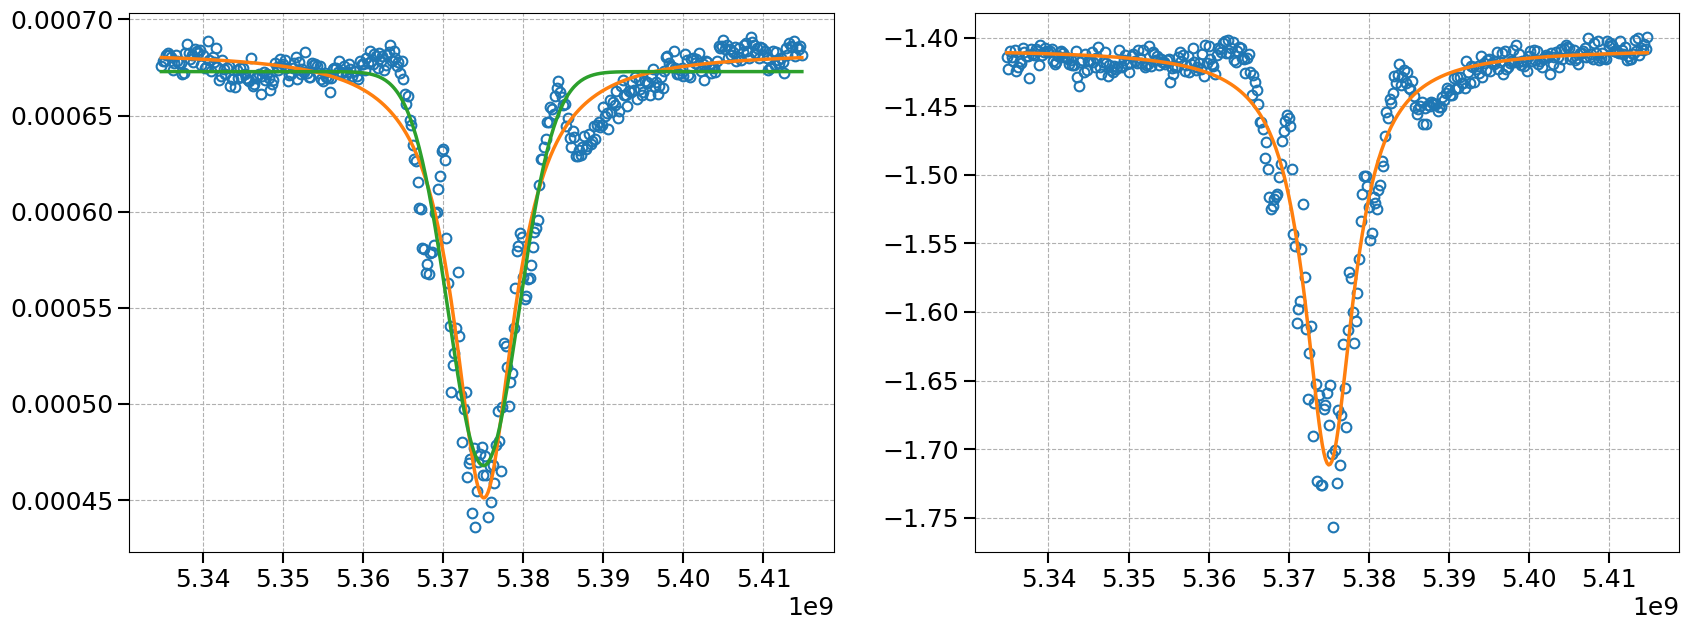

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))

fit_abs = sqil.fit.fit_lorentzian(freq, mag)
fit_phase = sqil.fit.fit_lorentzian(freq, uphase)
x_fit = np.linspace(freq[0], freq[1], 500)

fit_mag_gauss = sqil.fit.fit_gaussian(freq, mag)
fit_mag_gauss.summary()

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag, "o")
axs[0].plot(freq, fit_abs.predict(freq))
axs[0].plot(freq, fit_mag_gauss.predict(freq))

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_phase.predict(freq))

fit_abs.summary()
fit_phase.summary();

plt.show()

In [3]:
# x0, fwhm, peak_height, y0, is_peak
sqil.fit._guess.estimate_peak(freq, mag)

(np.float64(5375800000.0),
 np.float64(22600000.0),
 np.float64(0.00022663580137978066),
 np.float64(0.000670228708434473),
 False)

### Fit with mag noise

In [7]:
mag_noise = np.concatenate([mag[25:125], mag[:100], mag[10:110], mag[25:126]])
phase_noise = np.concatenate([uphase[25:125], uphase[:100], uphase[10:110], uphase[25:126]])

In [ ]:
import numpy as np
import sqil_core as sqil
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))


from analysis.fit import find_shared_peak

fit_res = find_shared_peak(freq, mag, uphase)
fit_res.summary()
print(f"Resonance: {sqil.format_number(fit_res.params_by_name['x0'], 6, unit="Hz", latex=False)}")

ModuleNotFoundError: No module named 'analysis'

Gaussian fit is better   ΔAIC = 5.0530
Lorentzian fit is better ΔAIC = -0.8060
Lorentzian domninates
 -> nrmse: 0.0982 vs 0.0852
nrmse       0.01111  GOOD
reduced χ²  1.018    GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A1      | -2251.39        | 177700         |  -7891.82 |
| fwhm1   |     1.94854e+07 |      1.082e+09 |   5552.02 |
| y01     |     0.000686049 |      0.00772   |   1125.28 |
| A2      |    -2.36716e+06 | 110000         |     -4.65 |
| fwhm2   |     1.54926e+07 | 569900         |      3.68 |
| y02     |    -1.41751     |      0.00543   |     -0.38 |
| x0      |     5.37501e+09 |  92090         |      0    |

Resonance: 5.37501 GHz


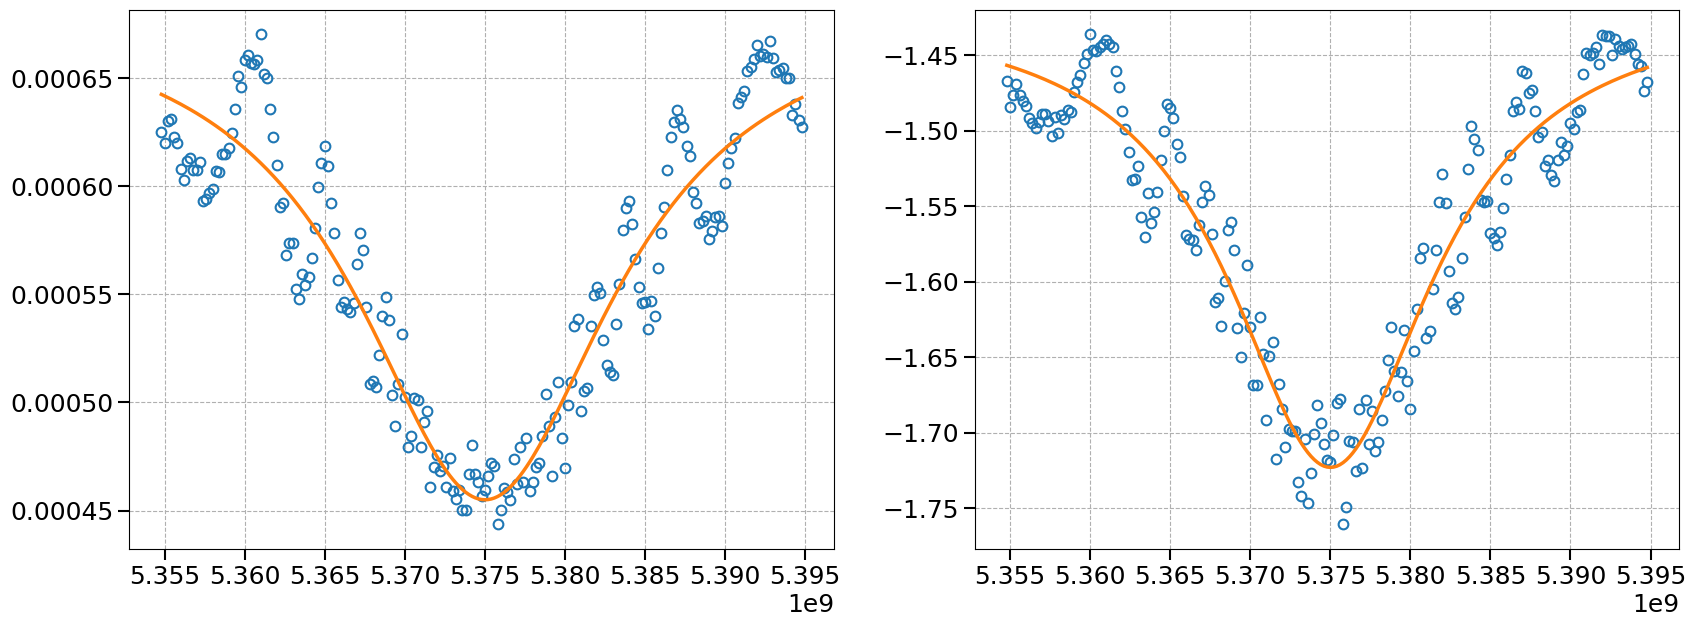

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00203-qubit_spectroscopy_2025-06-12T120132"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00207-qubit_spectroscopy_2025-06-12T120238"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))

fit_res = find_shared_peak(freq, mag, uphase)
fit_res.summary()

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag, "o")
axs[0].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[: len(freq)])

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[len(freq) :])

print(
    f"Resonance: {sqil.format_number(fit_res.params_by_name['x0'], 6, unit="Hz", latex=False)}"
)
plt.show()

In [79]:
y_data = mag
x0, fwhm, peak_height, y0, is_peak = sqil.fit.estimate_peak(freq, y_data)

peak_height / np.median(y_data)

np.float64(0.3799208416075699)

In [58]:
from scipy.signal import find_peaks


def robust_noise_std(y):
    """
    Robust estimator using Median Absolute Deviation (MAD),
    which is resilient to peaks.
    """
    med = np.median(y)
    mad = np.median(np.abs(y - med))
    return 1.4826 * mad  # Convert MAD to standard deviation


def estimate_snr_auto(y, prominence_factor=3):
    noise_std = robust_noise_std(y)
    peaks, props = find_peaks(y, prominence=prominence_factor * noise_std)
    if len(peaks) == 0:
        return 0.0
    peak_amp = props["prominences"].max()
    return peak_amp / noise_std


estimate_snr_auto(uphase)

np.float64(6.410587885707485)

In [ ]:
y = mag_noise

med = np.median(y)
mad = np.median(np.abs(y - med))

np.float64(0.005328883994463167)

nrmse       0.02824  GOOD
reduced χ²  1.009    GREAT
| Param   |     Fitted value |      STD error |      % Error |
|---------|------------------|----------------|--------------|
| A1      |      1.85668e+06 |      3.113e+13 |  1.67661e+09 |
| fwhm1   |     -3.4621e+09  |      1.933e+16 | -5.58455e+08 |
| y01     |     -0.000398275 |  11970         | -3.00479e+09 |
| A2      | 530768           | 145800         | 27.46        |
| fwhm2   |      1.79366e+07 |      5.48e+06  | 30.55        |
| y02     |     -1.46487     |      0.003937  | -0.27        |
| x0      |      5.34423e+09 |      1.419e+06 |  0.03        |



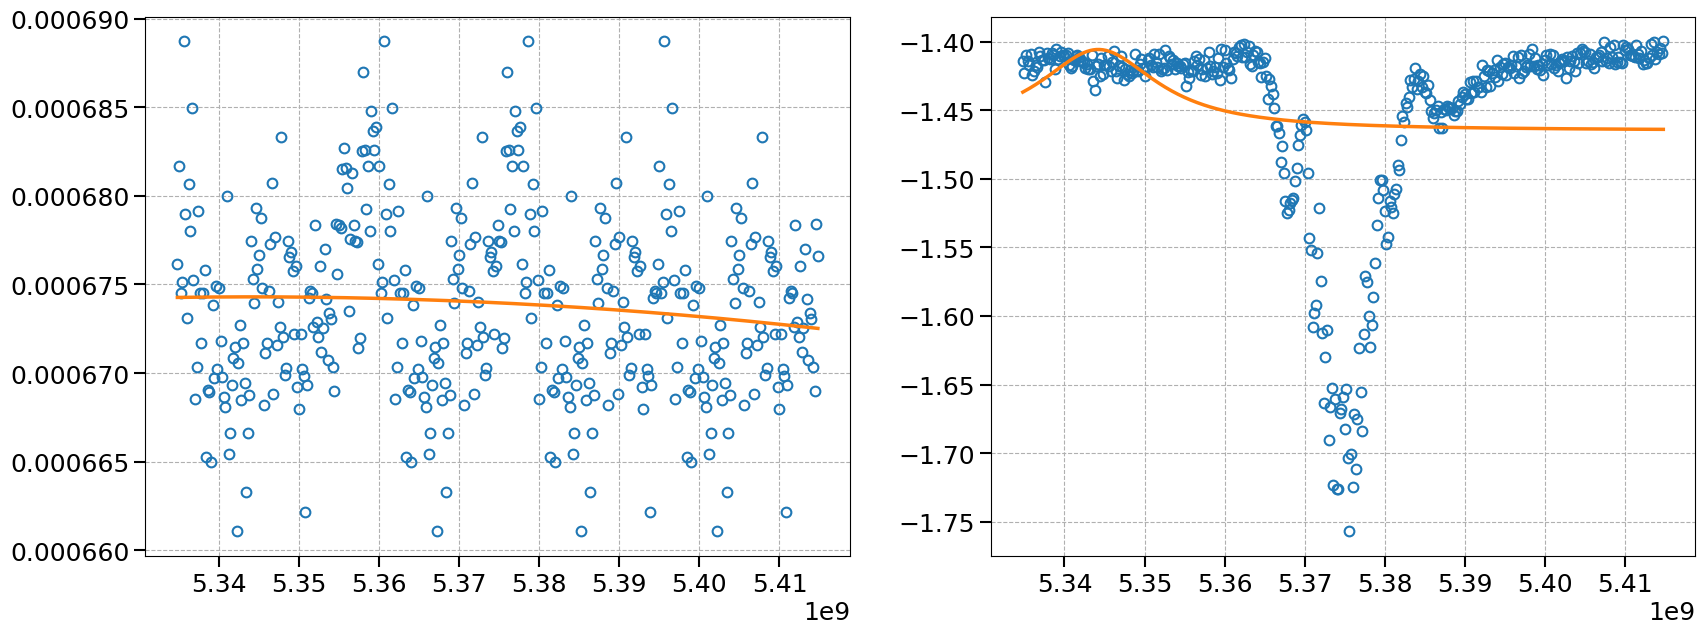

In [ ]:
fit_both = sqil.fit.fit_two_lorentzians_shared_x0(freq, mag_noise, freq, uphase)
fit_both.summary();

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag_noise, "o")
axs[0].plot(freq, fit_both.predict(freq, freq, *fit_both.params)[: len(freq)])

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_both.predict(freq, freq, *fit_both.params)[len(freq) :])

plt.show()

### Test fit function

In [6]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))

fit_both = sqil.fit.fit_two_lorentzians_shared_x0(freq, mag, freq, uphase)

fit_both.summary();

nrmse       0.01111  GOOD
reduced χ²  1.018    GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A1      | -2251.39        | 177700         |  -7891.82 |
| fwhm1   |     1.94854e+07 |      1.082e+09 |   5552.02 |
| y01     |     0.000686049 |      0.00772   |   1125.28 |
| A2      |    -2.36716e+06 | 110000         |     -4.65 |
| fwhm2   |     1.54926e+07 | 569900         |      3.68 |
| y02     |    -1.41751     |      0.00543   |     -0.38 |
| x0      |     5.37501e+09 |  92090         |      0    |



nrmse       0.01111  GOOD
reduced χ²  1.018    GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A1      | -2251.39        | 177700         |  -7891.82 |
| fwhm1   |     1.94854e+07 |      1.082e+09 |   5552.02 |
| y01     |     0.000686049 |      0.00772   |   1125.28 |
| A2      |    -2.36716e+06 | 110000         |     -4.65 |
| fwhm2   |     1.54926e+07 | 569900         |      3.68 |
| y02     |    -1.41751     |      0.00543   |     -0.38 |
| x0      |     5.37501e+09 |  92090         |      0    |



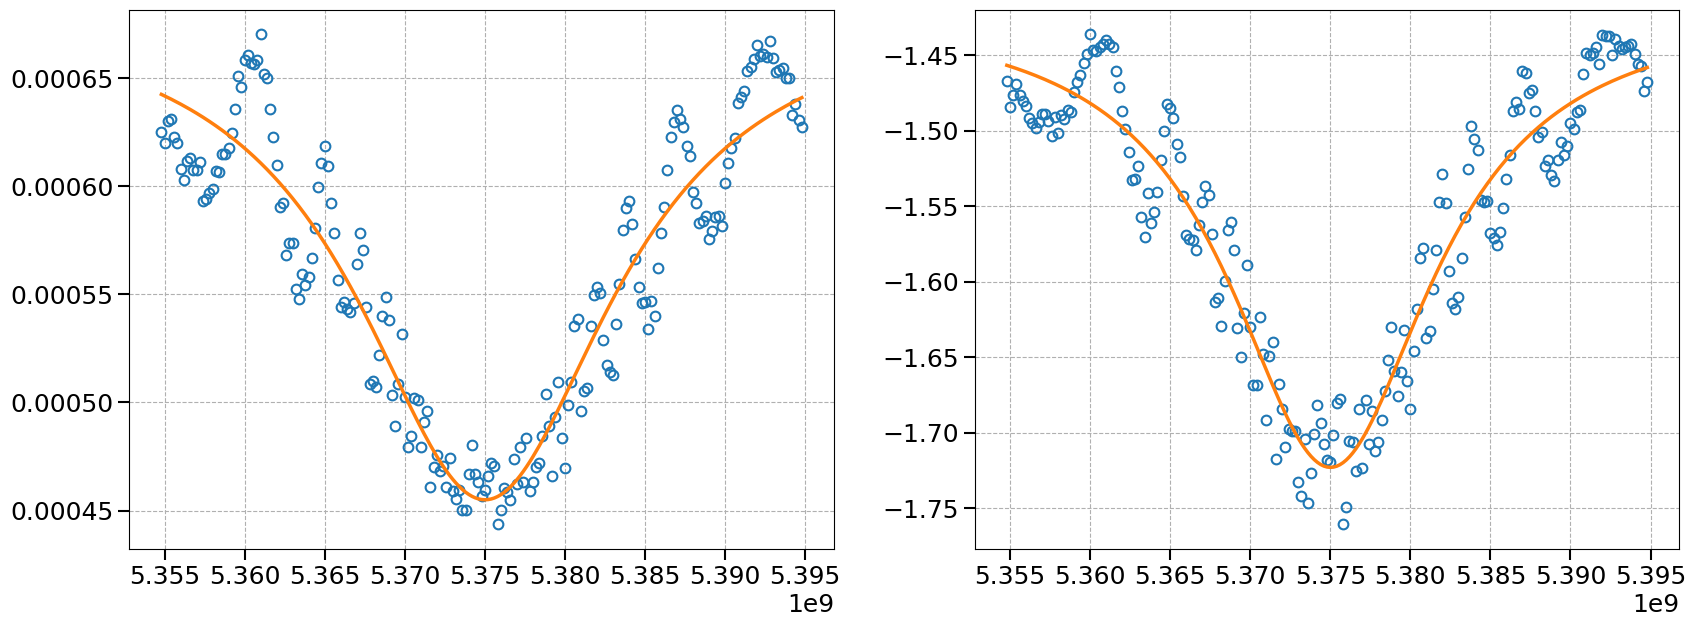

In [7]:
from sqil_core.fit import fit_input, fit_output
from scipy.optimize import curve_fit
from sqil_core.fit._models import lorentzian
from sqil_core.fit._guess import lorentzian_guess, lorentzian_bounds
import numpy as np
import matplotlib.pyplot as plt


def lorentzian(x, A, x0, fwhm, y0):
    return A * (np.abs(fwhm) / 2) / ((x - x0) ** 2 + (fwhm**2 / 4)) + y0


def combined_lorentzian(x1, x2, A1, fwhm1, y01, A2, fwhm2, y02, x0):
    y1 = lorentzian(x1, A1, x0, fwhm1, y01)
    y2 = lorentzian(x2, A2, x0, fwhm2, y02)
    return np.concatenate([y1, y2])


@fit_input
@fit_output
def fit_two_lorentzians_shared_x0(
    x_data_1,
    y_data_1,
    x_data_2,
    y_data_2,
    guess: list = None,
    bounds: list[tuple[float]] | tuple = (-np.inf, np.inf),
):
    y_all = np.concatenate([y_data_1, y_data_2])

    if guess == None:
        guess_1 = lorentzian_guess(x_data_1, y_data_1)
        guess_2 = lorentzian_guess(x_data_2, y_data_2)
        x01, x02 = guess_1[1], guess_2[1]
        x0 = np.mean([x01, x02])
        guess = np.concatenate([np.delete(guess_1, 1), np.delete(guess_2, 1), [x0]])

    if bounds == (-np.inf, np.inf):
        bounds = [[None] * len(guess), [None] * len(guess)]
        lower_guess_1, upper_guess_1 = lorentzian_bounds(x_data_1, y_data_1, guess_1)
        lower_guess_2, upper_guess_2 = lorentzian_bounds(x_data_2, y_data_2, guess_2)
        # Combine bounds for 1 and 2
        lower_guess = np.concatenate(
            [
                np.delete(lower_guess_1, 1),
                np.delete(lower_guess_2, 1),
                [np.min([lower_guess_1, lower_guess_2])],
            ]
        )
        upper_guess = np.concatenate(
            [
                np.delete(upper_guess_1, 1),
                np.delete(upper_guess_2, 1),
                [np.max([upper_guess_1, upper_guess_2])],
            ]
        )
        bounds = (lower_guess, upper_guess)

    res = curve_fit(
        lambda _, A1, fwhm1, y01, A2, fwhm2, y02, x0: combined_lorentzian(
            x_data_1, x_data_2, A1, fwhm1, y01, A2, fwhm2, y02, x0
        ),
        xdata=np.zeros_like(y_all), # dummy x, since x1 and x2 are fixed via closure
        ydata=y_all,
        p0=guess,
        # bounds=bounds,
        full_output=True
    )

    return res, {
            "param_names": ["A1", "fwhm1", "y01", "A2", "fwhm2", "y02", "x0"],
            "predict": combined_lorentzian,
            "fit_output_vars": { "x_data": np.concatenate([x_data_1, x_data_2]), "y_data": y_all }
        }

fit_res = fit_two_lorentzians_shared_x0(freq, mag, freq, uphase)
fit_res.summary();

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag, "o")
axs[0].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[:len(freq)])

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[len(freq):])
# axs[1].plot(freq, fit_phase.predict(freq))

plt.show()

2025-06-17 08:14:56,043 - INFO - Successfully connected to zi
c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\setup/setup_test.py:53: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  return generate_device_setup(


[2025.06.17 08:14:56.055] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.06.17 08:14:56.057] INFO    VERSION: laboneq 2.53.0
[2025.06.17 08:14:56.059] INFO    Connecting to data server at localhost:8004
[2025.06.17 08:14:56.062] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.17 08:14:56.070] INFO    Configuring the device setup
[2025.06.17 08:14:56.077] INFO    The device setup is configured


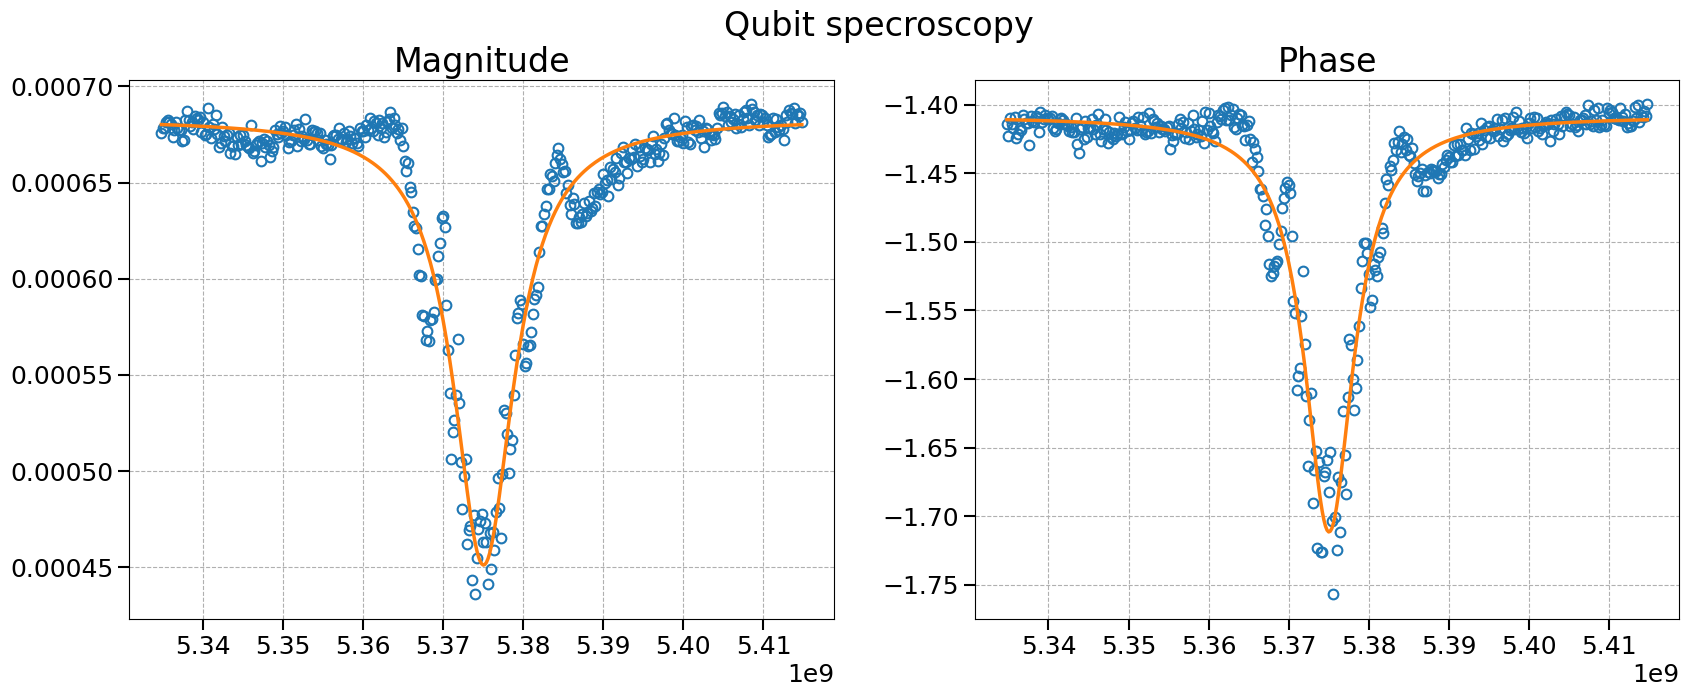

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00203-qubit_spectroscopy_2025-06-12T120132"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00207-qubit_spectroscopy_2025-06-12T120238"

qu_freq = 5.3748e9

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 1000
options.averaging_mode = AveragingMode.CYCLIC

# result = qu_spec.run(
#     np.linspace(qu_freq - 40e6, qu_freq + 40e6, 401),
#     # sweeps={"spectroscopy_amplitude": np.linspace(0,1,5)},
#     options=options,
# )

qu_spec.analyze(path)
plt.show()

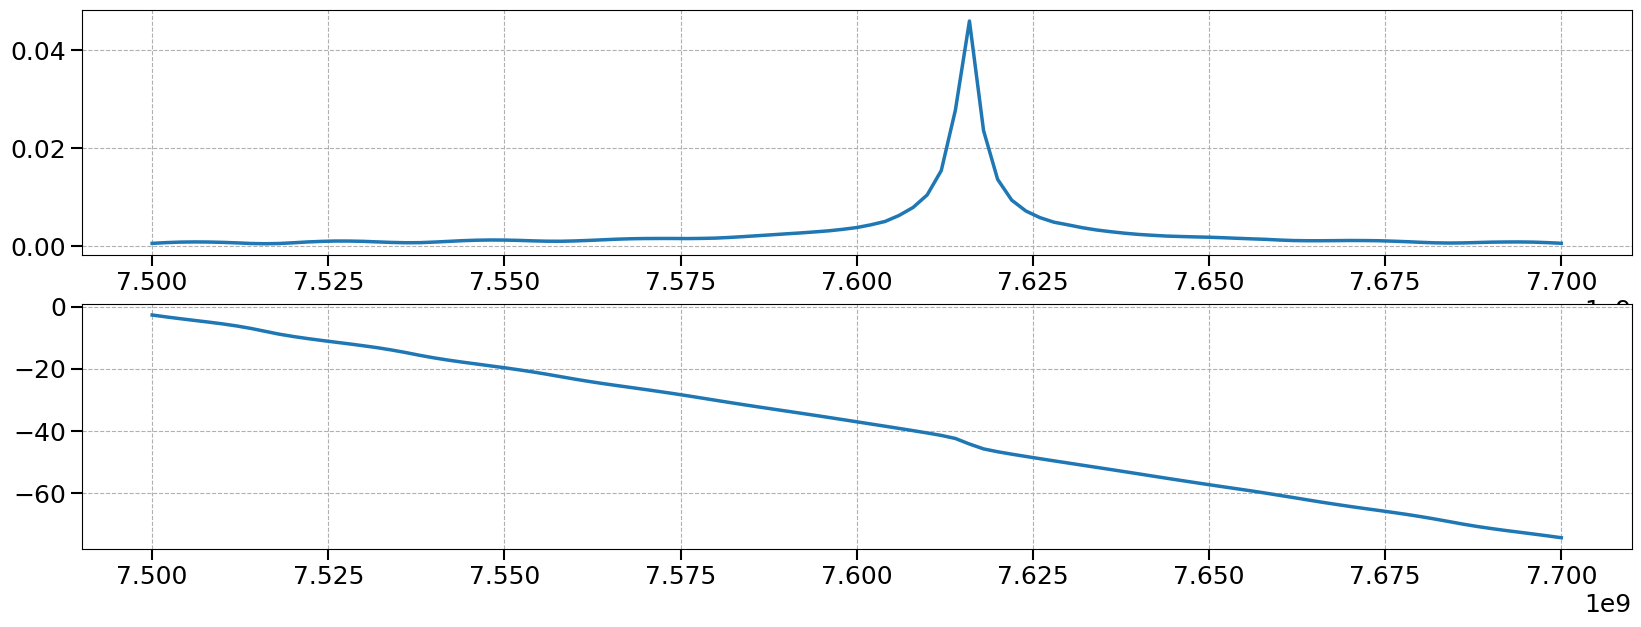

In [4]:
import sqil_core as sqil
import matplotlib.pyplot as plt
import numpy as np
from rr_spec import ResonatorSpectroscopyExperimentOptions

# 1D
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00077-rr spectroscopy_2025-05-13T210835"
# 2D
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-05-14\00009-rr_spectroscopy_2025-05-14T182042"
# # errorbar
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-05-22\00023-rr_spectroscopy_2025-05-22T102016"


data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)

result = None

sqil.set_plot_style(plt)

# 1D
fig, axs = plt.subplots(2, 1)
axs[0].plot(freq, np.abs(data))
axs[1].plot(freq, np.unwrap(np.angle(data)))

# 2D
# fig, ax = plt.subplots(1, 1)
# ax.pcolormesh(freq, sweep, np.abs(data))

# Errorbar
# fig, ax = plt.subplots(1, 1, figsize=(16, 5))
# linmag = np.abs(data[0])
# ax.errorbar(
#     freq[0],
#     np.mean(linmag, axis=0),
#     np.std(linmag, axis=0),
#     fmt="-o",
#     color="tab:blue",
#     label="Mean with Error",
#     ecolor="tab:orange",
#     capsize=5,
#     capthick=2,
#     elinewidth=2,
#     markersize=5,
# )

plt.show()

In [14]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-02\00295-resonator_spectroscopy_2025-07-02T150328"

d,f,s, sc = sqil.extract_h5_data(path, ['data', 'frequencies', 'sweep0'], schema=True)

sc

'{"data": {"type": "data"}, "frequencies": {"type": "x-axis", "unit": "Hz"}, "sweep0": {"type": "axis", "name": "readout_amplitude"}}'

In [37]:
10 + 20 * np.log10(0.055)

np.float64(-15.192746210115121)

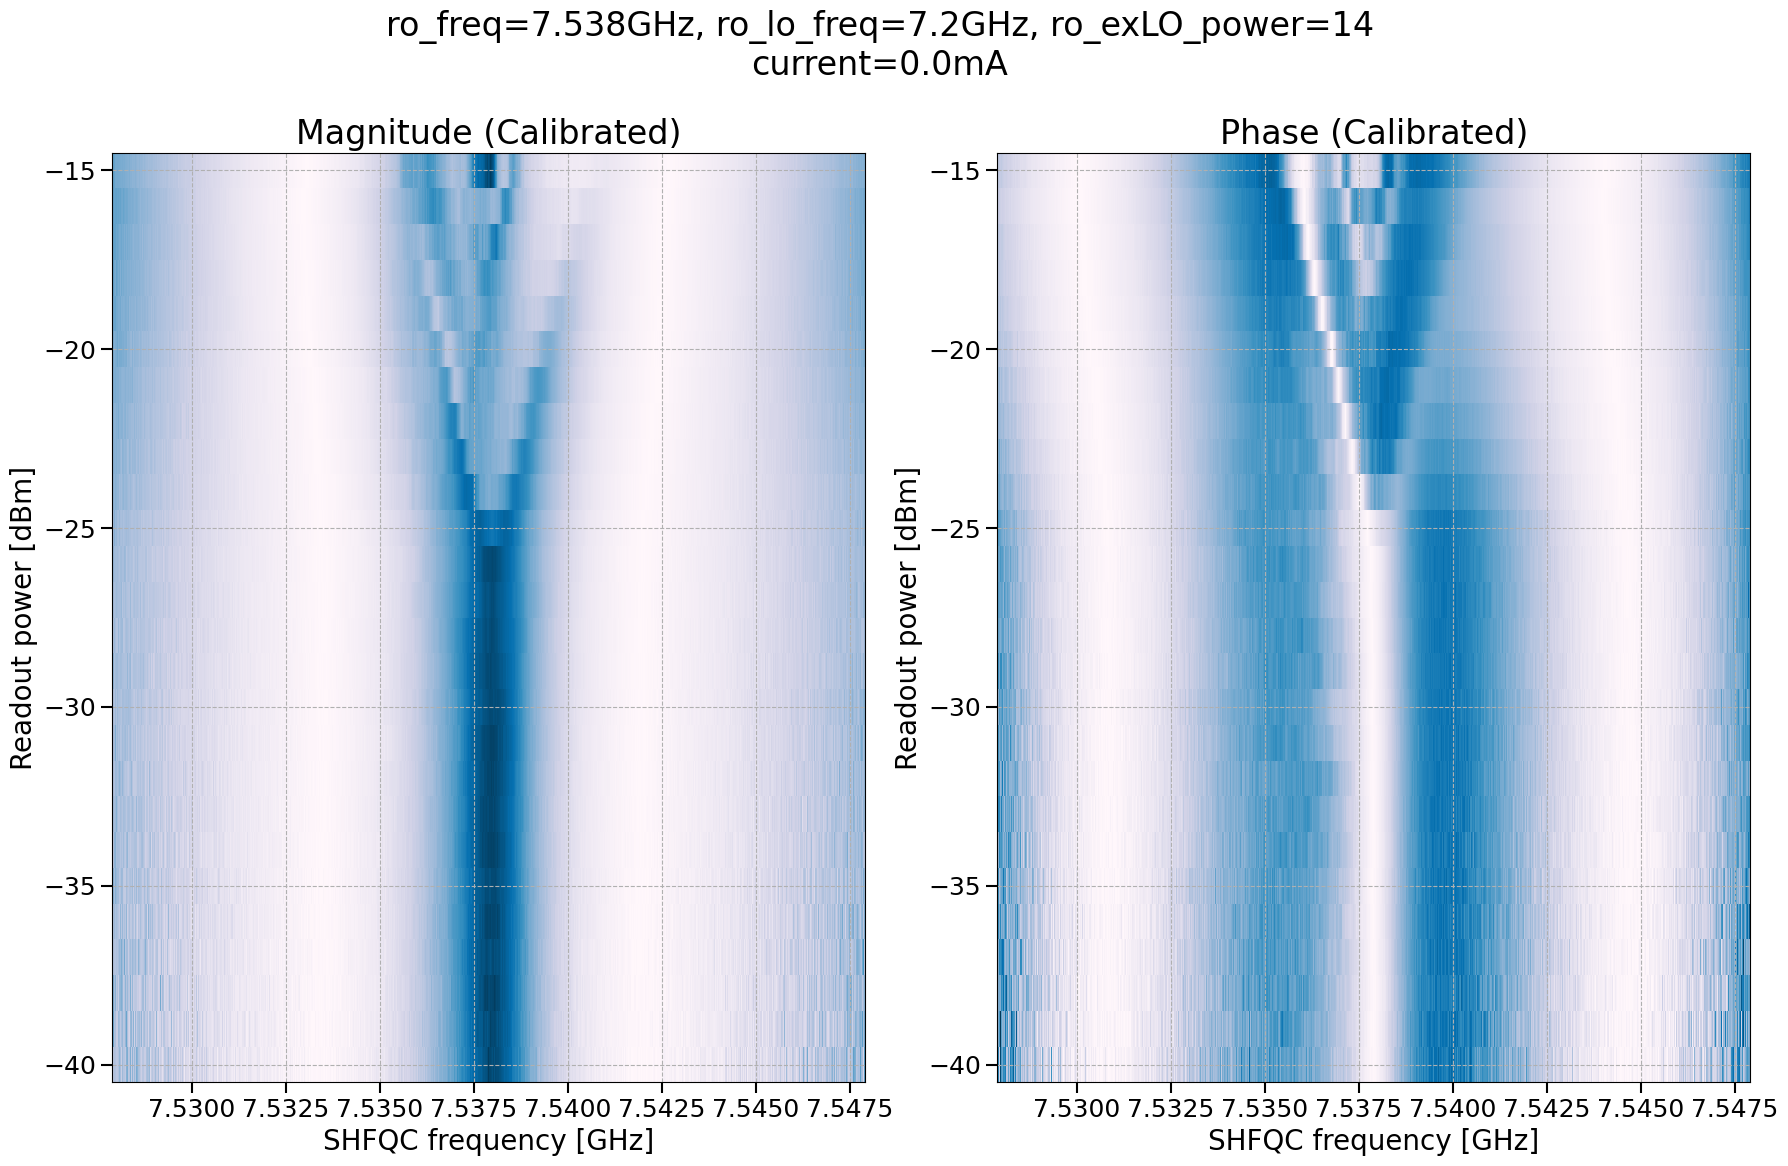

In [42]:
figsize2D = (18, 12)

def norm_2D_data(data_2d):

    mean = np.nanmean(data_2d, axis=1, keepdims=True)
    std = np.nanstd(data_2d, axis=1, keepdims=True)
    plot_2d = np.abs((data_2d - mean) / std)

    # Rescale raw data.
    threshold = 4.0 * np.mean(plot_2d.flatten())
    alpha = 1.0 / (4.0 * np.std(plot_2d.flatten()))

    plot_2d = np.tanh(alpha * (plot_2d - threshold))
    plot_2d -= np.min(plot_2d)
    plot_2d /= np.max(plot_2d)

    return plot_2d


def mag_phase_2D_plot(mag2D, phase2D, xdata, ydata, xlabel, ylabel, title):
    # Create subplots for magnitude and phase
    fig = plt.figure(figsize=figsize2D)
    ax_mag = fig.add_subplot(121)
    ax_phase = fig.add_subplot(122)

    mag2D = norm_2D_data(mag2D)
    phase2D = norm_2D_data(np.unwrap(phase2D))
    # Magnitude Plot (ax_mag)
    c_mag = ax_mag.pcolormesh(xdata, ydata, mag2D, shading="auto", cmap="PuBu")
    # fig.colorbar(c_mag, ax=ax_mag, label='Magnitude [dB]')
    ax_mag.set_title("Magnitude (Calibrated)")
    ax_mag.set_xlabel(xlabel)
    ax_mag.set_ylabel(ylabel)
    # Phase Plot (ax_phase)
    c_phase = ax_phase.pcolormesh(
        xdata, ydata, np.unwrap(phase2D), shading="auto", cmap="PuBu"
    )
    # fig.colorbar(c_phase, ax=ax_phase, label='Phase [rad]')
    ax_phase.set_title("Phase (Calibrated)")
    ax_phase.set_xlabel(xlabel)
    ax_phase.set_ylabel(ylabel)

    # Adjust layout for better appearance
    fig.suptitle(title)

    return fig

import h5py


def offset_for_1p5D_plot(data2D):
    """
    offset the mag/phase 2D array to align the first component to zero
    """
    data2D = data2D - data2D[:, 0].reshape(len(data2D), 1)
    return data2D


def norm_2D_data(data_2d):

    mean = np.nanmean(data_2d, axis=1, keepdims=True)
    std = np.nanstd(data_2d, axis=1, keepdims=True)
    plot_2d = np.abs((data_2d - mean) / std)

    # Rescale raw data.
    threshold = 4.0 * np.mean(plot_2d.flatten())
    alpha = 1.0 / (4.0 * np.std(plot_2d.flatten()))

    plot_2d = np.tanh(alpha * (plot_2d - threshold))
    plot_2d -= np.min(plot_2d)
    plot_2d /= np.max(plot_2d)

    return plot_2d


from scipy.optimize import curve_fit
import json
def flatten_phase(phase1D):
    # remove the backbround linear term and flatten the phase
    # simple guess
    slope = (phase1D[-1] - phase1D[0]) / len(phase1D)
    offset = phase1D[0]
    xdata = np.linspace(0, len(phase1D) - 1, len(phase1D))

    def func(xdata, slope, offset):
        return slope * xdata + offset

    popt, pcov = curve_fit(
        f=func,
        xdata=xdata,
        ydata=phase1D,
        p0=[slope, offset],  # initial value
    )
    fit_slope, fit_offset = popt
    calibrated_phase1D = phase1D - func(xdata, fit_slope, fit_offset)
    return calibrated_phase1D


def plotting_2D_vs_ro_power(path):
    filename = path + r"\data.ddh5"
    h5file = h5py.File(filename, "r")
    data = np.array(h5file["data"]["data"][::])
    mag2D = 20 * np.log10(np.abs(data))  # dBm mag
    mag2D = offset_for_1p5D_plot(mag2D)
    phase2D = np.array([np.unwrap(np.angle(data[i, :])) for i in range(len(data))])
    phase2D = np.array([flatten_phase(phase2D[i, :]) for i in range(len(phase2D))])
    phase2D = offset_for_1p5D_plot(phase2D)
    ro_freq = np.array(h5file["data"]["ro_freq"][0]) * 1e-9  # [GHz]
    ro_power = np.array(h5file["data"]["sweep_param"][::])
    xlabel = "SHFQC frequency [GHz]"
    ylabel = "Readout power [dBm]"

    param_dict_path = path + r"\param_dict.json"
    with open(param_dict_path) as f:
        param_dict = json.load(f)

    title = (
        f"ro_freq={np.round(param_dict['ro_freq']*1e-9,3)}GHz, "
        + f"ro_lo_freq={np.round(param_dict["ro_lo_freq"]*1e-9,3)}GHz, "
        + f"ro_exLO_power={param_dict["ro_exLO_power"]}\n"
        + f"current={param_dict['current']*1e3}mA"
    )

    fig = mag_phase_2D_plot(mag2D, phase2D, ro_freq, ro_power, xlabel, ylabel, title)
    fig.tight_layout()
    fig.savefig(f"{path}/2D_vs_ro_power.png", bbox_inches="tight")

# Control
path = r"Z:\Projects\BottomLoader\data\20250709_Transmon_250513_N35\2025-07-08\00005-pulsed_onetone_vs_ro_power_2025-07-08T151245"
# Target
# path = r"Z:\Projects\BottomLoader\data\test\2025-07-08\00322-resonator_spectroscopy_2025-07-08T155106"

plotting_2D_vs_ro_power(path)
plt.show()

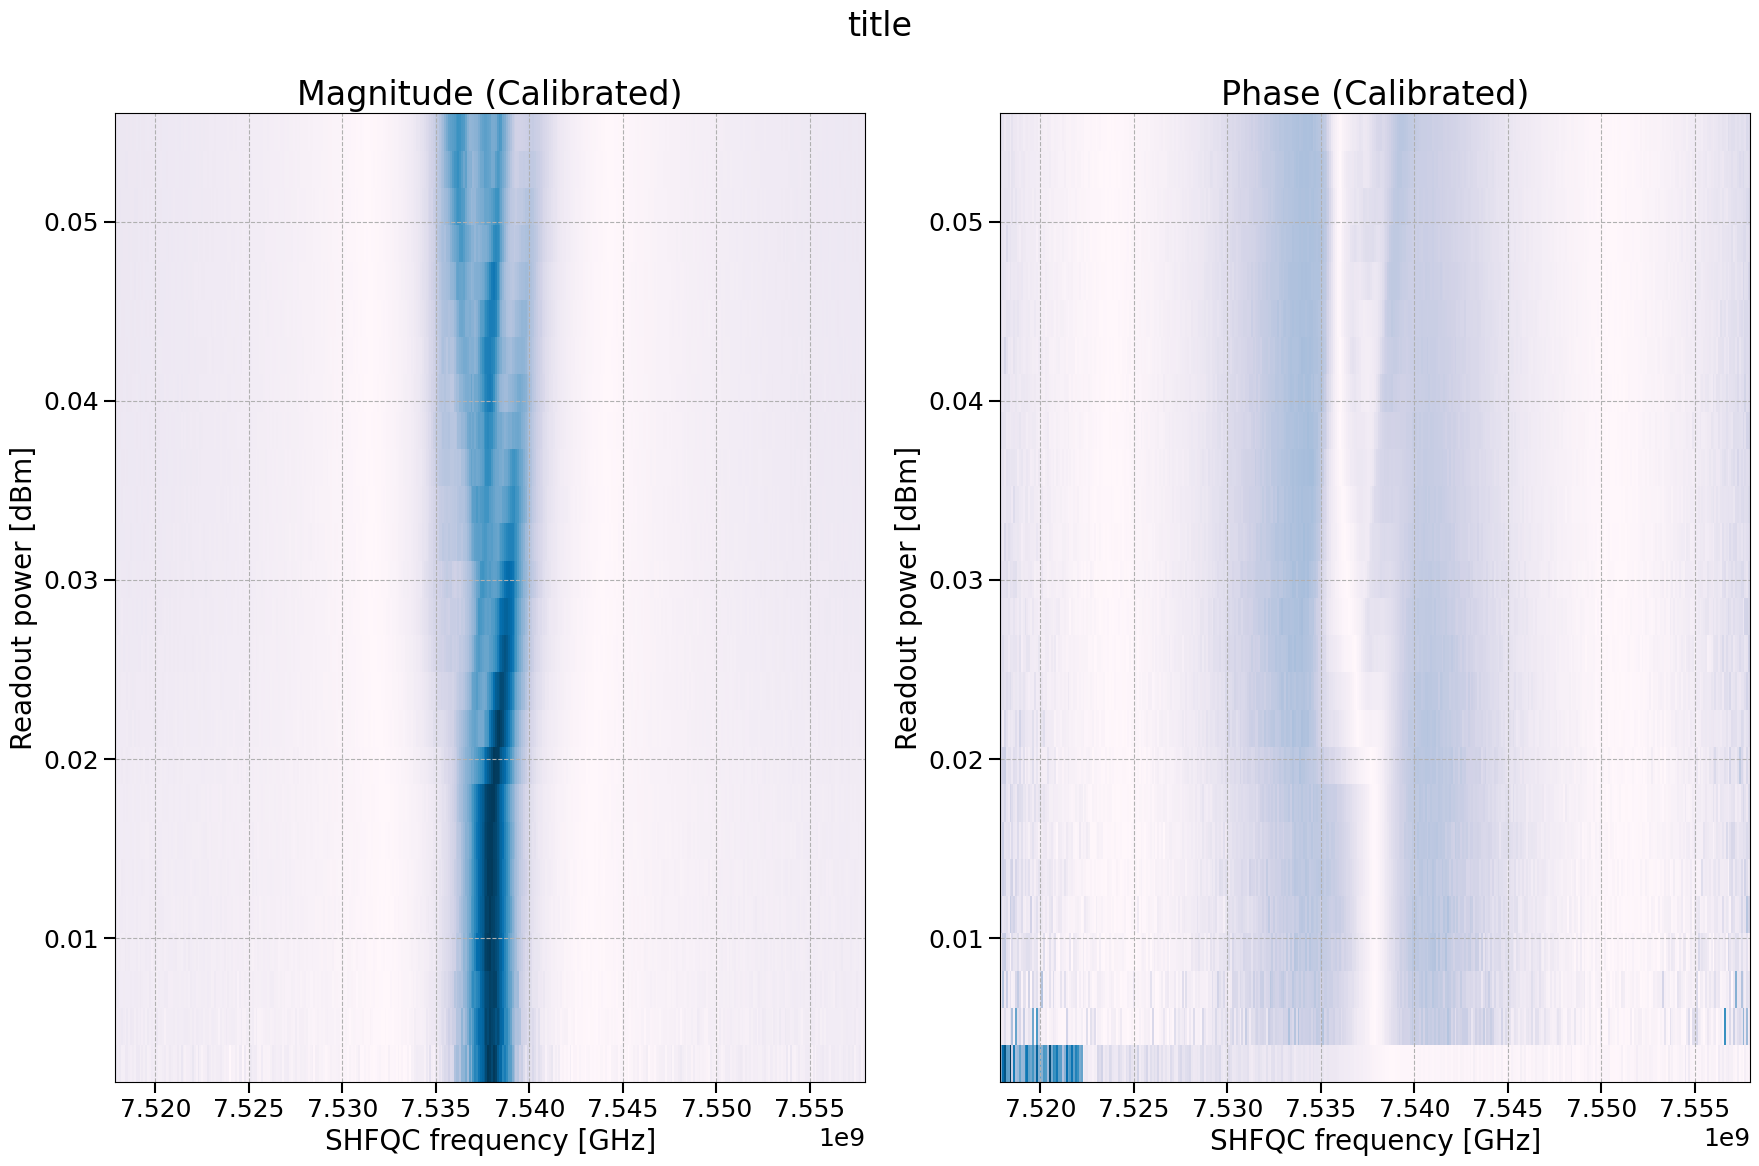

In [53]:
figsize2D = (18, 12)


def norm_2D_data(data_2d):

    mean = np.nanmean(data_2d, axis=1, keepdims=True)
    std = np.nanstd(data_2d, axis=1, keepdims=True)
    plot_2d = np.abs((data_2d - mean) / std)

    # Rescale raw data.
    threshold = 4.0 * np.mean(plot_2d.flatten())
    alpha = 1.0 / (4.0 * np.std(plot_2d.flatten()))

    plot_2d = np.tanh(alpha * (plot_2d - threshold))
    plot_2d -= np.min(plot_2d)
    plot_2d /= np.max(plot_2d)

    return plot_2d


def mag_phase_2D_plot(mag2D, phase2D, xdata, ydata, xlabel, ylabel, title):
    # Create subplots for magnitude and phase
    fig = plt.figure(figsize=figsize2D)
    ax_mag = fig.add_subplot(121)
    ax_phase = fig.add_subplot(122)

    mag2D = norm_2D_data(mag2D)
    phase2D = norm_2D_data(np.unwrap(phase2D))
    # Magnitude Plot (ax_mag)
    c_mag = ax_mag.pcolormesh(xdata, ydata, mag2D, shading="auto", cmap="PuBu")
    # fig.colorbar(c_mag, ax=ax_mag, label='Magnitude [dB]')
    ax_mag.set_title("Magnitude (Calibrated)")
    ax_mag.set_xlabel(xlabel)
    ax_mag.set_ylabel(ylabel)
    # Phase Plot (ax_phase)
    c_phase = ax_phase.pcolormesh(
        xdata, ydata, np.unwrap(phase2D), shading="auto", cmap="PuBu"
    )
    # fig.colorbar(c_phase, ax=ax_phase, label='Phase [rad]')
    ax_phase.set_title("Phase (Calibrated)")
    ax_phase.set_xlabel(xlabel)
    ax_phase.set_ylabel(ylabel)

    # Adjust layout for better appearance
    fig.suptitle(title)

    return fig


import h5py


def offset_for_1p5D_plot(data2D):
    """
    offset the mag/phase 2D array to align the first component to zero
    """
    data2D = data2D - data2D[:, 0].reshape(len(data2D), 1)
    return data2D


def norm_2D_data(data_2d):

    mean = np.nanmean(data_2d, axis=1, keepdims=True)
    std = np.nanstd(data_2d, axis=1, keepdims=True)
    plot_2d = np.abs((data_2d - mean) / std)

    # Rescale raw data.
    threshold = 4.0 * np.mean(plot_2d.flatten())
    alpha = 1.0 / (4.0 * np.std(plot_2d.flatten()))

    plot_2d = np.tanh(alpha * (plot_2d - threshold))
    plot_2d -= np.min(plot_2d)
    plot_2d /= np.max(plot_2d)

    return plot_2d


from scipy.optimize import curve_fit
import json


def flatten_phase(phase1D):
    # remove the backbround linear term and flatten the phase
    # simple guess
    slope = (phase1D[-1] - phase1D[0]) / len(phase1D)
    offset = phase1D[0]
    xdata = np.linspace(0, len(phase1D) - 1, len(phase1D))

    def func(xdata, slope, offset):
        return slope * xdata + offset

    popt, pcov = curve_fit(
        f=func,
        xdata=xdata,
        ydata=phase1D,
        p0=[slope, offset],  # initial value
    )
    fit_slope, fit_offset = popt
    calibrated_phase1D = phase1D - func(xdata, fit_slope, fit_offset)
    return calibrated_phase1D


def plotting_2D_vs_ro_power(path):
    data, ro_freq, ro_power = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])
    mag2D = np.abs(data)
    # mag2D = 20 * np.log10(np.abs(data))
    # mag2D = offset_for_1p5D_plot(mag2D)
    phase2D = np.array([np.unwrap(np.angle(data[i, :])) for i in range(len(data))])
    phase2D = np.array([flatten_phase(phase2D[i, :]) for i in range(len(phase2D))])
    phase2D = offset_for_1p5D_plot(phase2D)
    xlabel = "SHFQC frequency [GHz]"
    ylabel = "Readout power [dBm]"

    fig = mag_phase_2D_plot(mag2D, phase2D, ro_freq, ro_power, xlabel, ylabel, "title")
    fig.tight_layout()
    fig.savefig(f"{path}/2D_vs_ro_power.png", bbox_inches="tight")


# Control
# path = r"Z:\Projects\BottomLoader\data\20250709_Transmon_250513_N35\2025-07-08\00005-pulsed_onetone_vs_ro_power_2025-07-08T151245"
# Target
path = r"Z:\Projects\BottomLoader\data\test\2025-07-08\00322-resonator_spectroscopy_2025-07-08T155106"

plotting_2D_vs_ro_power(path)
plt.show()

First local minimum at x = 0.0142, y = 0.0036752823998808318


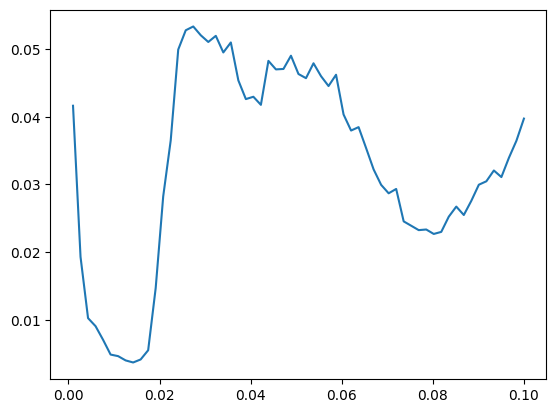

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-12\00439-resonator_spectroscopy_2025-07-12T232710"
file = f"{path}/extra.ddh5"
y_data = sqil.extract_h5_data(file, ['nrmses'], schema=False)
x_data = sqil.extract_h5_data(path, ["sweep0"], schema=False)



plt.plot(x_data, y_data)

nrmse       0.03089  ACCEPTABLE
reduced χ²  1.104    GOOD
| Param   |   Fitted value |   STD error |   % Error |
|---------|----------------|-------------|-----------|
| A       |    0.000210534 |   5.663e-06 |      2.69 |
| tau     |    0.000192995 |   0.003245  |   1681.5  |
| y0      |    0.000107878 |   2.025e-06 |      1.88 |
| phi     |    1.38929e-07 |   4.394e-10 |      0.32 |
| T       |    1.4747e-07  |   3.809e-10 |      0.26 |



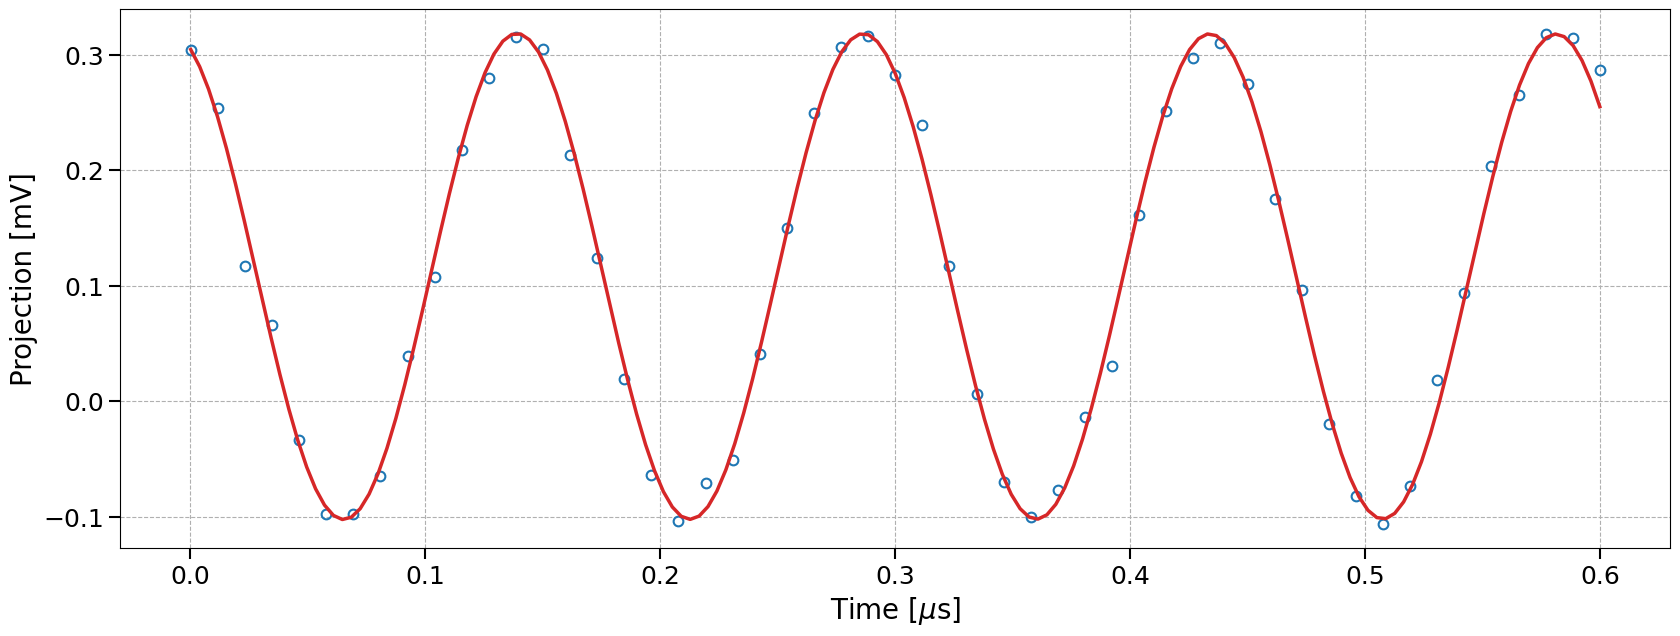

In [2]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt


path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00497-time_rabi_2025-07-13T115057"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00496-time_rabi_2025-07-13T115020"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00495-time_rabi_2025-07-13T114958"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00494-time_rabi_2025-07-13T114850"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00492-time_rabi_2025-07-13T114759"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00499-time_rabi_2025-07-13T122420"

data, lengths = sqil.extract_h5_data(path, ["data", "pulse_lengths"])

sqil.set_plot_style(plt)

proj, inv = sqil.fit.transform_data(data, inv_transform=True)
fit_res = sqil.fit.fit_decaying_oscillations(lengths, proj)
x_fit = np.linspace(lengths[0], lengths[-1], 3 * len(lengths))
inverse_fit = inv(fit_res.predict(x_fit))


fig, ax_proj = plt.subplots(1,1)
ax_proj.plot(lengths * 1e6, np.real(proj) * 1e3, "o")
ax_proj.plot(x_fit * 1e6, fit_res.predict(x_fit) * 1e3, "tab:red")
ax_proj.set_xlabel(r"Time [$\mu$s]")
ax_proj.set_ylabel("Projection [mV]")

fit_res.summary()
plt.show()

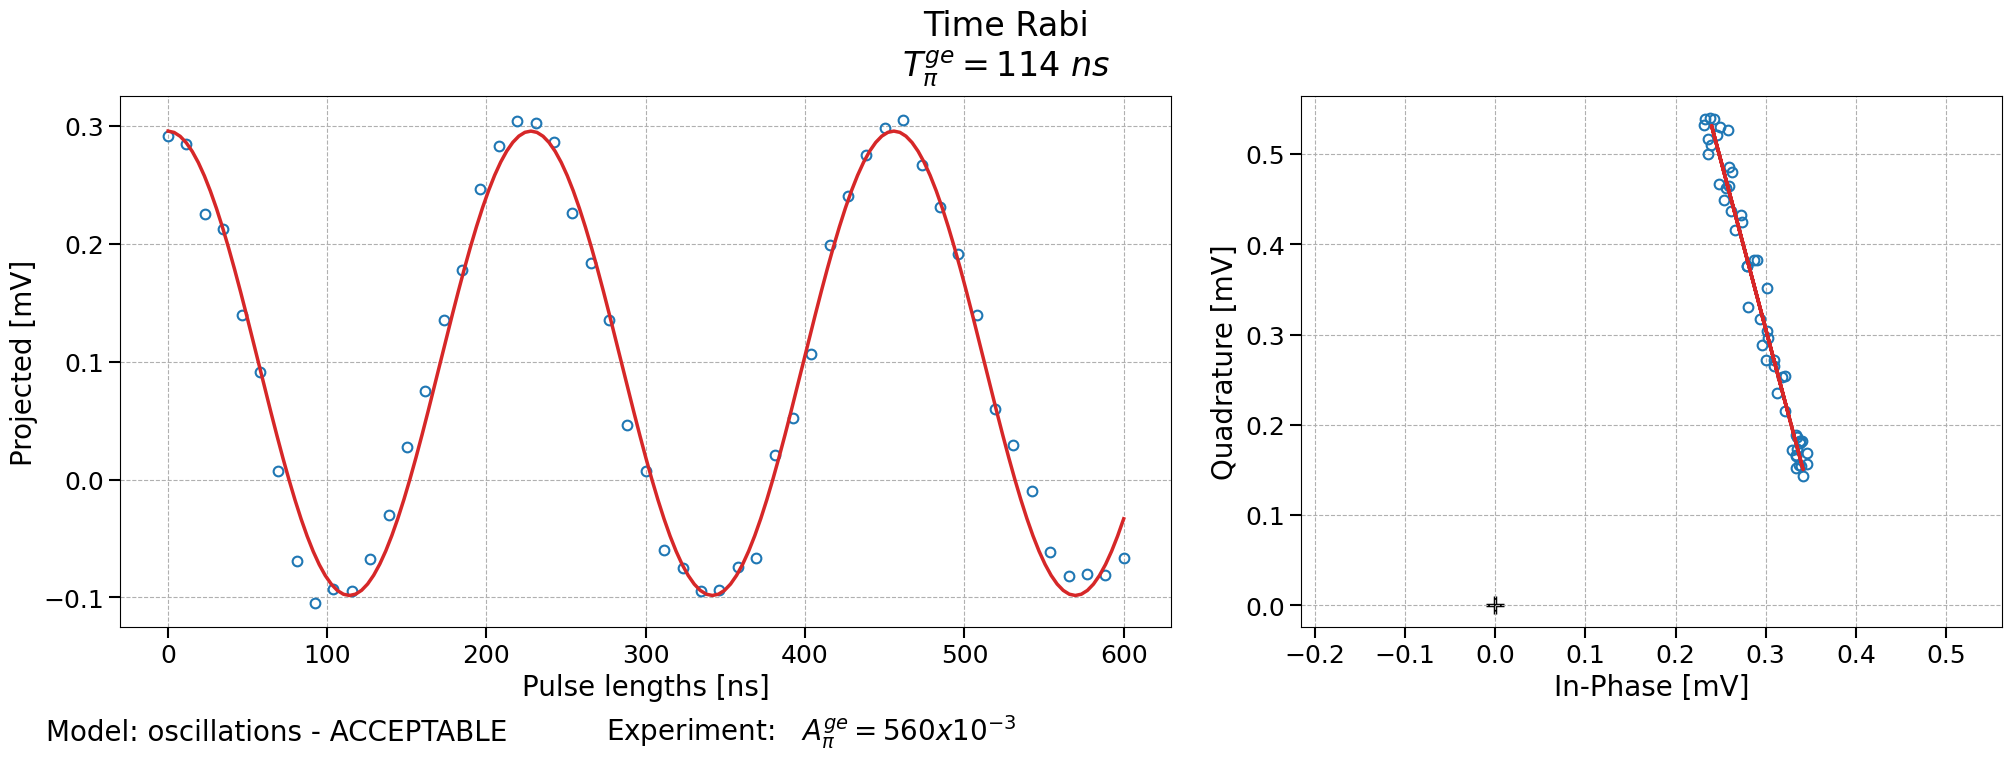

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt
from sqil_core.experiment import AnalysisResult
from matplotlib.gridspec import GridSpec

from sqil_core.utils import *


def analyze_time_rabi(
    path=None,
    datadict=None,
    qpu=None,
    qu_uid="q0",
    transition="ge",
    relevant_params=None,
    **kwargs,
):
    # Extract data and metadata
    all_data, all_info, datadict = get_data_and_info(path=path, datadict=datadict)
    lengths, y_data, sweeps = all_data
    x_info, y_info, sweep_info = all_info

    # Extract qubit parameters
    if qpu is None and path is not None:
        qpu = read_qpu(path, "qpu_old.json")
    qubit_params = {}
    if qpu is not None:
        qubit_params = enrich_qubit_params(qpu.quantum_element_by_uid(qu_uid))

    if relevant_params is None:
        relevant_params = [f"{transition}_drive_amplitude_pi"]

    anal_res = AnalysisResult()
    anal_res.updated_params["q0"] = {}

    sqil.set_plot_style(plt)

    has_sweeps = y_data.ndim > 1

    if not has_sweeps:
        try: 
            # Project the data and start plot
            proj, inv = sqil.fit.transform_data(y_data, inv_transform=True)
            fig, axs = plot_projection_IQ(datadict=datadict, proj_data=proj)
            anal_res.figures.update({"fig": fig})
            # Analyze
            fit_res_exp = sqil.fit.fit_decaying_oscillations(lengths, proj)
            fit_res_const = sqil.fit.fit_oscillations(lengths, proj)
            fit_res = sqil.fit.get_best_fit(fit_res_exp, fit_res_const, recipe="nrmse_aic")
            x_fit = np.linspace(lengths[0], lengths[-1], 3 * len(lengths))
            inverse_fit = inv(fit_res.predict(x_fit))

            # Update parameters
            anal_res.updated_params["q0"].update(
                {f"{transition}_drive_length": fit_res.metadata["pi_time"]}
            )

            # Make parameters pretty
            omega_r = sqil.format_number(1 / fit_res.params_by_name["T"], unit="Hz")
            t_pi = sqil.format_number(fit_res.metadata["pi_time"], unit="s")

            # Plot the fit
            axs[0].plot(x_fit * x_info.scale, fit_res.predict(x_fit) * y_info.scale, "tab:red")
            axs[1].plot(
                inverse_fit.real * y_info.scale,
                inverse_fit.imag * y_info.scale,
                "tab:red",
            )
        except Exception as e:
            print("Error while fitting projected data", e)

    elif has_sweeps:
        fig, axs = plot_mag_phase(datadict=datadict, raw=True)

    finalize_plot(
        fig,
        "Time Rabi",
        fit_res,
        qubit_params,
        anal_res.updated_params[qu_uid],
        sweep_info=sweep_info,
        relevant_params=relevant_params,
    )

    return anal_res


path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00517-time_rabi_2025-07-13T162743"
analyze_time_rabi(path=path)
plt.show()

In [6]:
def get_data_and_info(path=None, datadict=None):
    if path is None and datadict is None:
        raise Exception("At least one of `path` and `datadict` must be specified.")

    if path is not None:
        datadict = extract_h5_data(path, schema=True)

    # Get schema and map data
    schema = datadict.get("schema")
    x_data, y_data, sweeps, datadict_map = map_data_dict(datadict)

    # Get metadata on x_data and y_data
    x_info = param_info_from_schema(
        datadict_map["x_data"], schema[datadict_map["x_data"]]
    )
    y_info = param_info_from_schema(
        datadict_map["y_data"], schema[datadict_map["y_data"]]
    )

    sweep_info = []
    for sweep_key in datadict_map["sweeps"]:
        sweep_info.append(param_info_from_schema(sweep_key, schema[sweep_key]))
    
    return (x_data, y_data, sweeps), (x_info, y_info, sweep_info)



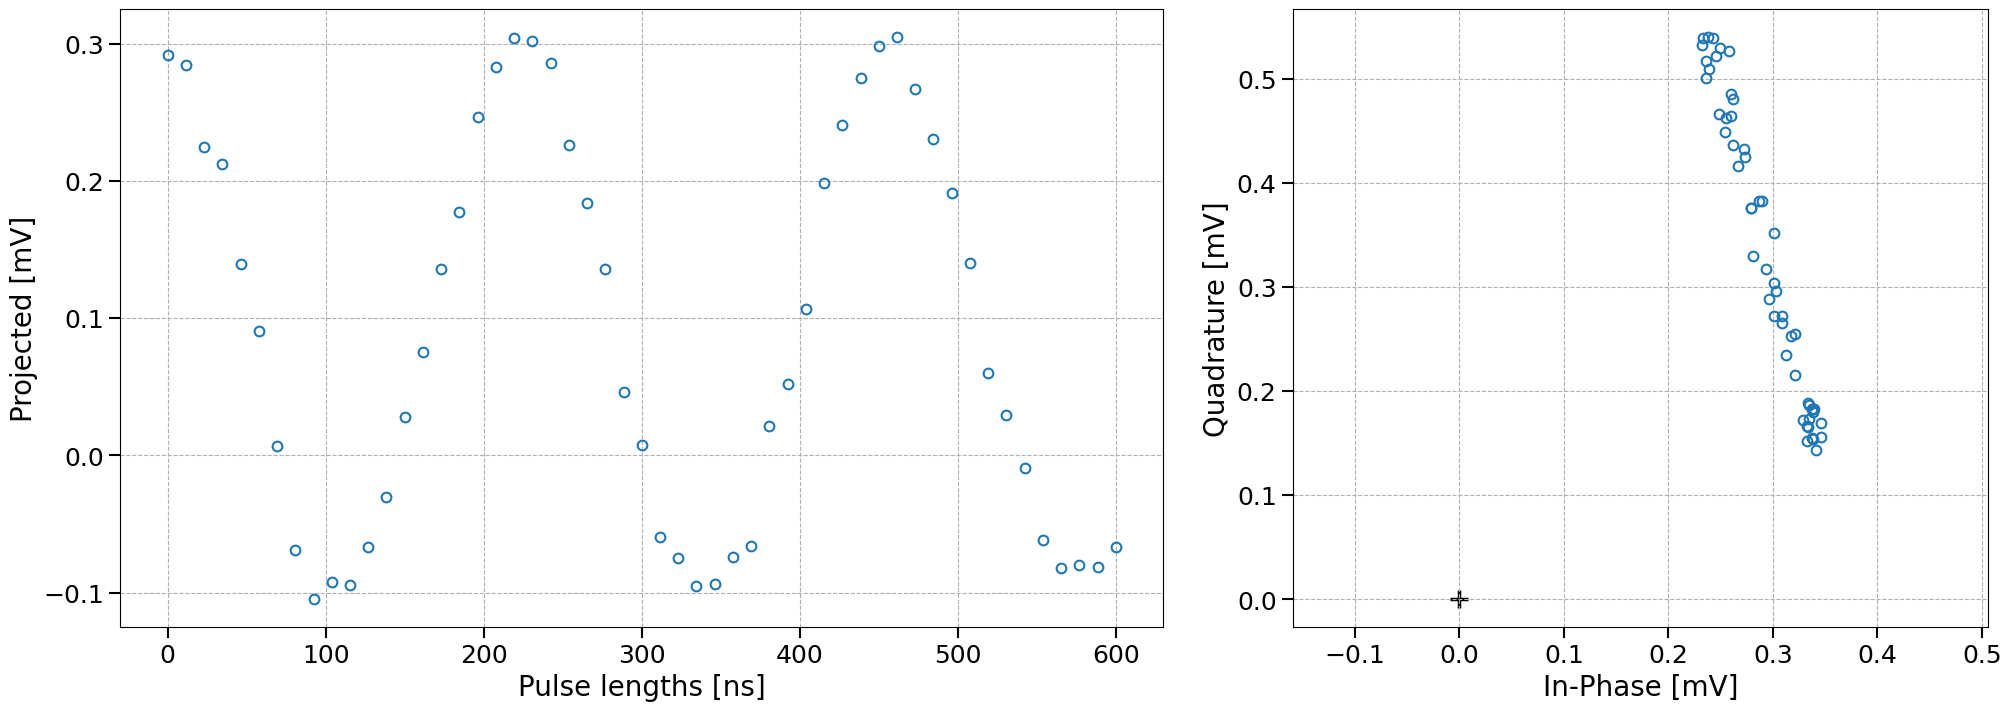

In [7]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt
from sqil_core.experiment import AnalysisResult
from matplotlib.gridspec import GridSpec

from sqil_core.utils import *


def plot_projection_IQ(path=None, datadict=None):
    all_data, all_info = get_data_and_info(path=path, datadict=datadict)
    x_data, y_data, sweeps = all_data
    x_info, y_info, sweep_info = all_info

    # Get y_unit
    y_unit = f" [{y_info.rescaled_unit}]" if y_info.unit else ""

    set_plot_style(plt)

    if len(sweeps) == 0:
        # Project data
        proj, inv = sqil.fit.transform_data(y_data, inv_transform=True)

        sqil.set_plot_style(plt)
        fig = plt.figure(figsize=(20, 7), constrained_layout=True)
        gs = GridSpec(nrows=1, ncols=10, figure=fig, wspace=0.2)

        # Plot the projection
        ax_proj = fig.add_subplot(gs[:, :6])  # 6/10 width
        ax_proj.plot(x_data * x_info.scale, proj.real * y_info.scale, "o")
        ax_proj.set_xlabel(x_info.name_and_unit)
        ax_proj.set_ylabel("Projected" + y_unit)

        # Plot IQ data
        ax_iq = fig.add_subplot(gs[:, 6:])  # 4/10 width
        ax_iq.scatter(0, 0, marker="+", color="black", s=150)
        ax_iq.plot(y_data.real * y_info.scale, y_data.imag * y_info.scale, "o")
        ax_iq.set_xlabel("In-Phase" + y_unit)
        ax_iq.set_ylabel("Quadrature" + y_unit)
        ax_iq.set_aspect(aspect="equal", adjustable="datalim")

    return fig, [ax_proj, ax_iq], inv


path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00517-time_rabi_2025-07-13T162743"
plot_projection_IQ(path=path)
plt.show()

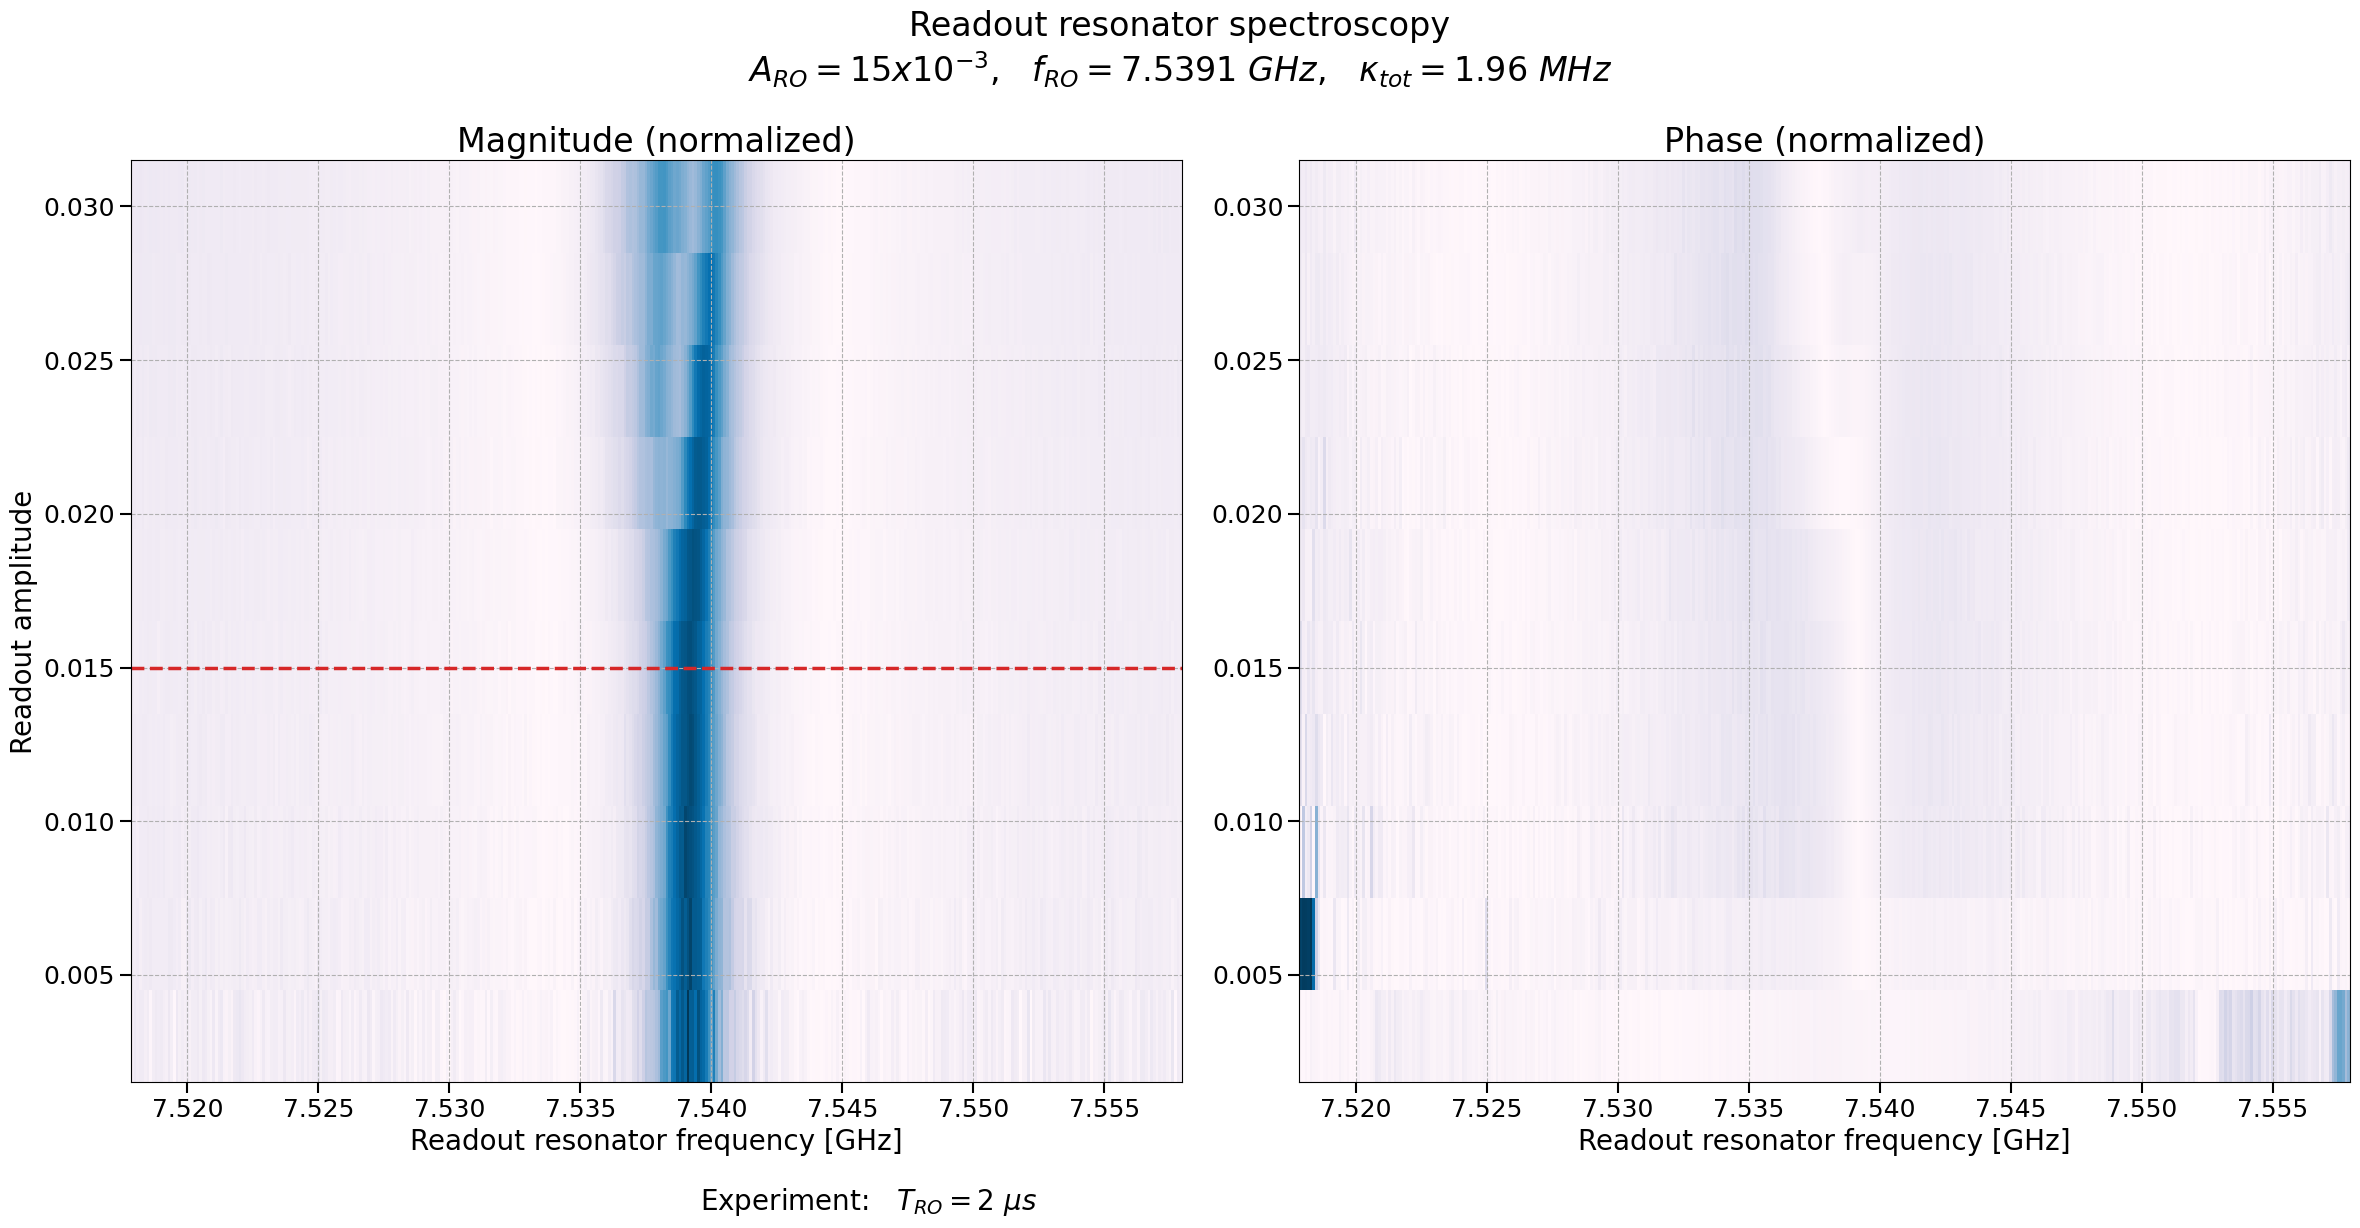

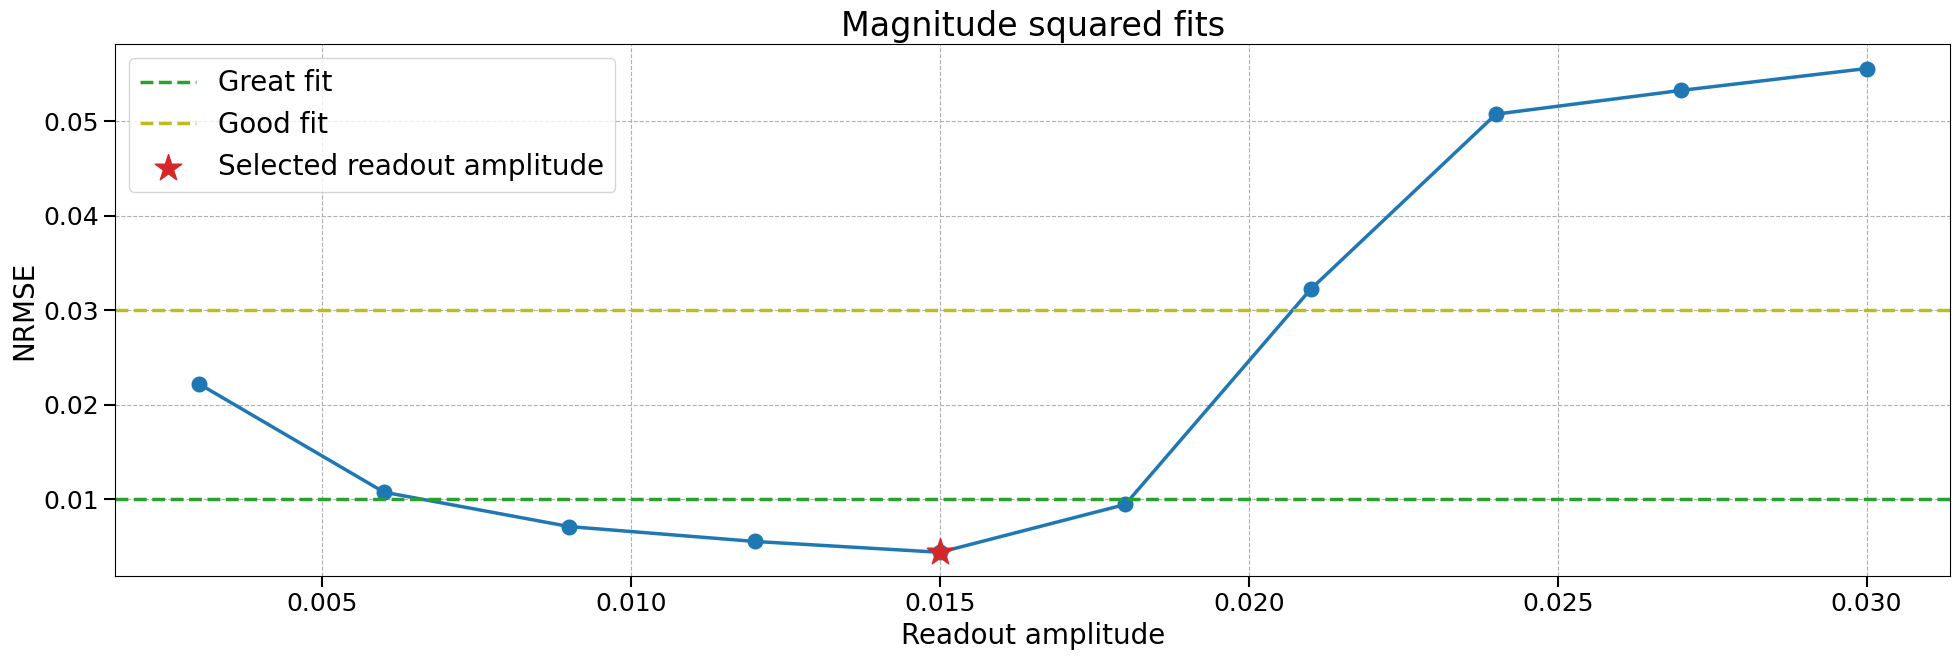

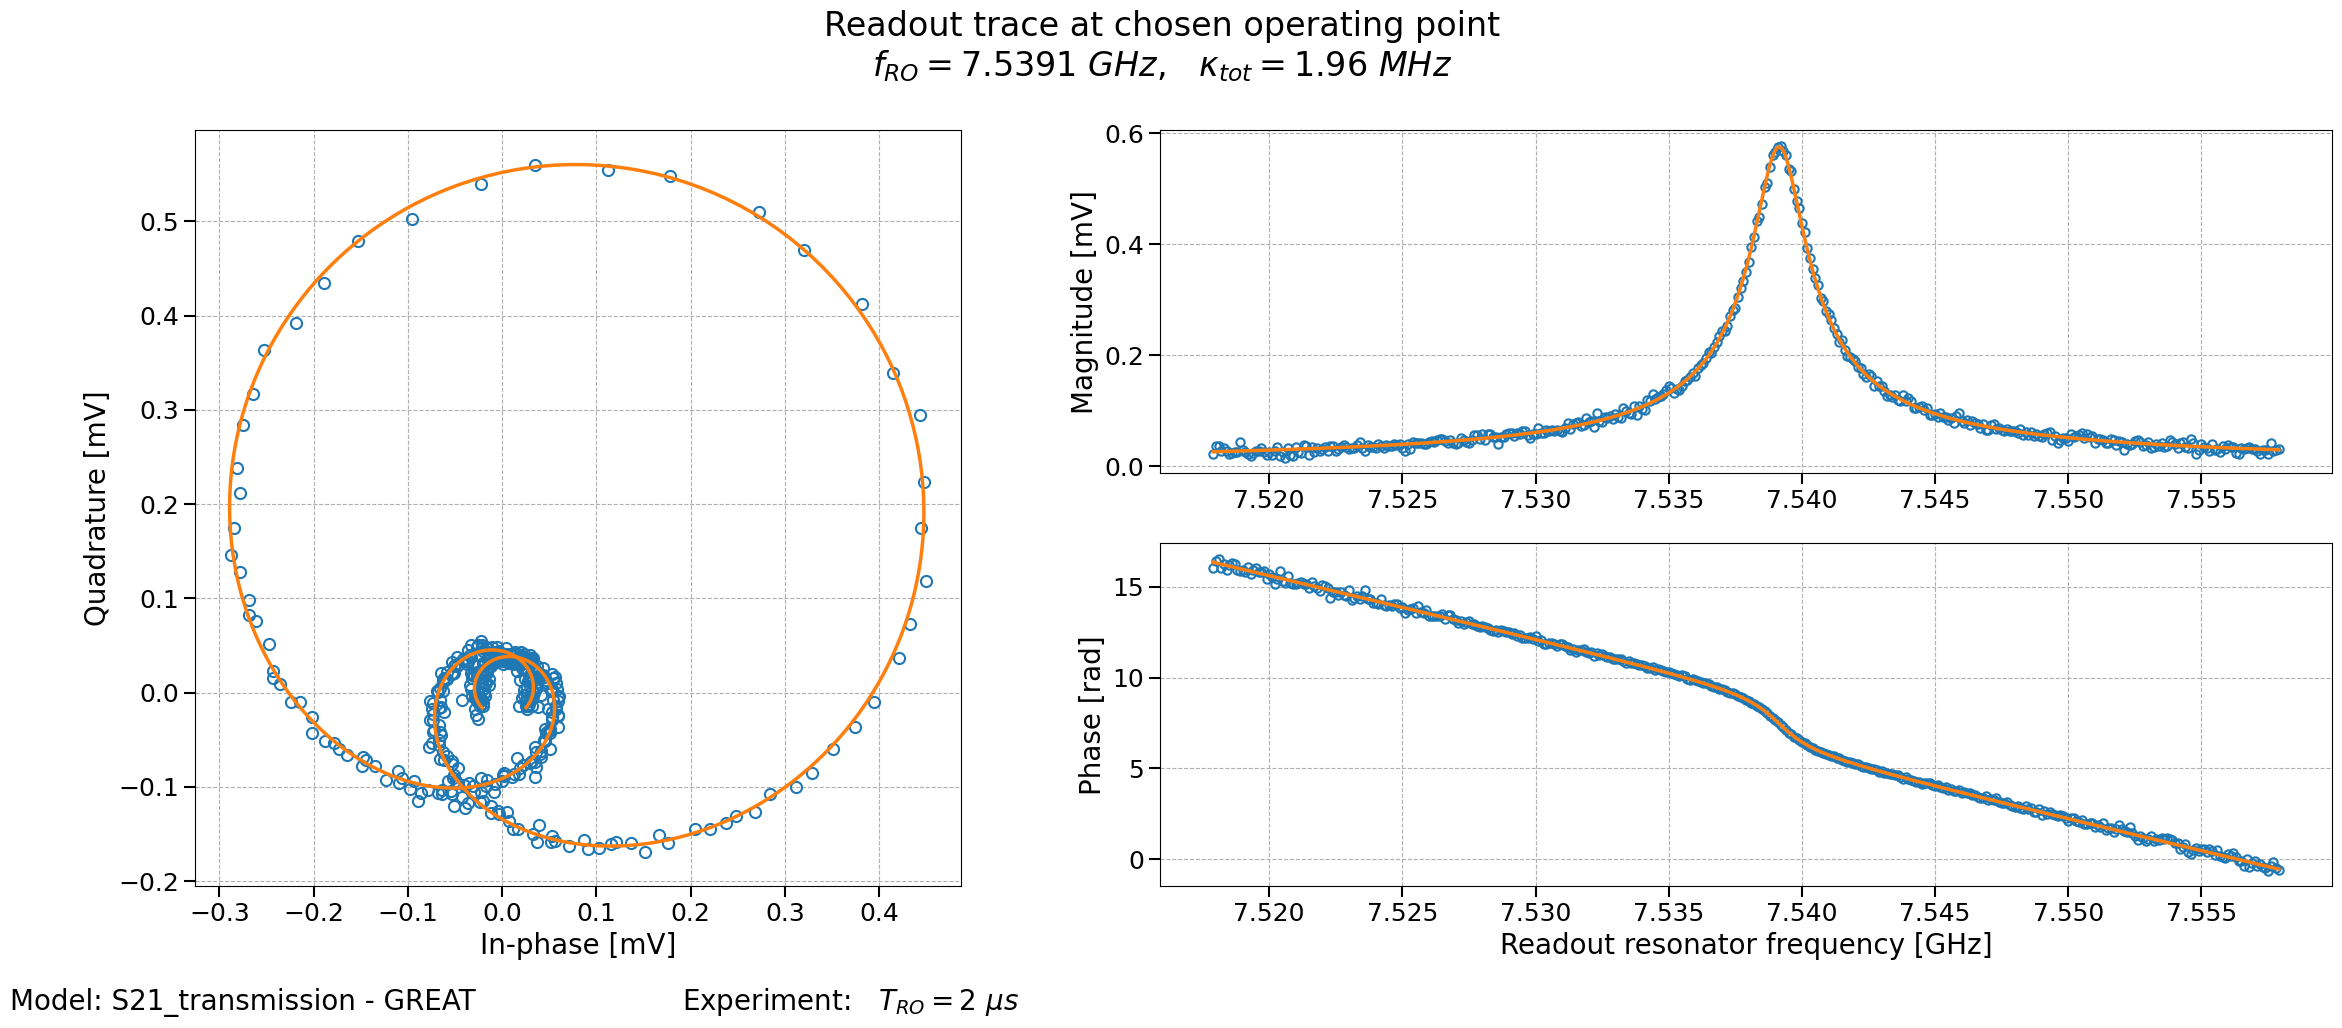

In [1]:
from sqil_core.utils import *
from sqil_core.experiment import AnalysisResult
from sqil_core.fit import FitQuality, FitResult
import numpy as np
import matplotlib.pyplot as plt
import sqil_core as sqil

def rr_spec_analysis(
    path=None, datadict=None, qpu=None, at_idx=None, relevant_params=ONE_TONE_PARAMS, qu_uid=0,  **kwargs
) -> AnalysisResult:
    # Prepare analysis result object
    anal_res = AnalysisResult()
    anal_res.updated_params[qu_uid] = {}
    fit_res = None

    # Extract data and metadata
    all_data, all_info, datadict = get_data_and_info(path=path, datadict=datadict)
    x_data, y_data, sweeps = all_data
    x_info, y_info, sweep_info = all_info

    # Extract qubit parameters
    if qpu is None and path is not None:
        qpu = read_qpu(path, "qpu_old.json")
    qubit_params = {}
    if qpu is not None:
        qubit_params = enrich_qubit_params(qpu.quantum_elements[qu_uid])

    measurement = qubit_params["readout_configuration"].value

    # Check if data has sweeps
    has_sweeps = y_data.ndim > 1
    if at_idx is not None:
        has_sweeps = False
        x_data, y_data = x_data[at_idx], y_data[at_idx]
        all_data = x_data, y_data, sweeps
        qubit_params[sweep_info[0].id].value = sweeps[0][at_idx]

    # Rescale data
    x_data_scaled = x_data * x_info.scale
    y_data_scaled = y_data * y_info.scale

    sqil.set_plot_style(plt)
    if not has_sweeps:
        y_unit = y_info.unit

        # If dB convert to linear magnitude for the fit
        if y_unit == "dB":
            y_data = 10 ** (np.abs(y_data) / 20) * np.exp(1j * np.angle(y_data))
            all_data = (x_data, y_data, sweeps)
            y_unit = "V"
        y_unit_str = f" [{y_info.rescaled_unit}]" if y_unit else ""

        # Plot without fit
        fig, axs = sqil.resonator.plot_resonator(x_data_scaled, y_data_scaled)
        anal_res.figures.update({"fig": fig})
        # Fix axis names
        axs[0].set_xlabel("In-phase" + y_unit_str)
        axs[0].set_ylabel("Quadrature" + y_unit_str)
        axs[1].set_ylabel("Magnitude" + y_unit_str)
        axs[2].set_xlabel(x_info.name_and_unit)

        # Try complex model fit
        try:
            fit_res = analyze_rr_complex_data(
                anal_res, all_data, all_info, measurement, axs, qu_uid
            )
        except Exception as e:
            print(f"Error fitting the complex resonator data:", e)
            print(f"Trying to fit just the magnitude")
            # Fallback to linmag squared fit
            try:
                fit_res = analyze_rr_magnitude(
                    anal_res, all_data, all_info, axs, qu_uid
                )
            except Exception as e2:
                print(f"Error fitting the magnitude:", e2)
                fit_res = None
    elif has_sweeps:
        fig, axs = plot_mag_phase(datadict=datadict)
        anal_res.figures.update({"fig": fig})

        sweep0_info = sweep_info[0]
        if sweep0_info.id == "readout_amplitude":
            # Try to extract the optimal readout amplitude
            # If the optimal amplitude is found, run rr_spec_analysis on the chosen trace
            analyze_rr_amplitude_sweep(
                anal_res, all_data, all_info, datadict, qpu, axs, qu_uid
            )
            fit_res = None

    finalize_plot(
        fig,
        "Readout resonator spectroscopy",
        fit_res=fit_res,
        qubit_params=qubit_params,
        updated_params=anal_res.updated_params[qu_uid],
        sweep_info=sweep_info,
        relevant_params=relevant_params,
    )

    fig.tight_layout()
    # plt.show()

    return anal_res





def analyze_rr_complex_data(anal_res, all_data, all_info, measurement, axs, qu_uid):
    """Analyze the complex data to extract the resonance frequency and kappa_tot."""
    x_data, y_data, _ = all_data
    x_info, y_info, _ = all_info

    is_wide_range = x_data[-1] - x_data[0] > 200e6
    fit_acceptability = (
        FitQuality.GOOD if is_wide_range else FitQuality.ACCEPTABLE
    )
    # Quick resonator fit to get parameter guesses
    guess = sqil.resonator.quick_fit(x_data, y_data, measurement)
    # Full resonator fit
    fit_res = sqil.resonator.full_fit(x_data, y_data, measurement, *guess)
    if not fit_res.is_acceptable("nrmse", threshold=fit_acceptability):
        raise Exception(
            f"Fit not acceptable with {fit_res.model_name} model, nrmse = {fit_res.metrics['nrmse']:.4f}"
        )
    # Extract parameters
    fr = fit_res.params_by_name["fr"]
    anal_res.updated_params[qu_uid]["readout_resonator_frequency"] = fr
    anal_res.updated_params[qu_uid]["readout_kappa_tot"] = (
        fr / fit_res.params_by_name["Q_tot"]
    )
    anal_res.fits.update({"Complex fit": fit_res})
    # Plot
    x_fit = np.linspace(x_data[0], x_data[-1], np.max([2000, len(x_data)]))
    y_fit_scaled = fit_res.predict(x_fit) * y_info.scale
    # Make sure the fitted unwrapped phase is aligned with the data
    # If the data has a background it might gain a phase offset to the perfectly linear fit
    phase_offset = 0
    if is_wide_range:
        fr_idx_data = find_closest_index(x_data, fr)
        fr_idx_fit = find_closest_index(x_fit, fr)
        uphase = np.unwrap(np.angle(y_data * y_info.scale))
        ufit = np.unwrap(np.angle(y_fit_scaled))
        phase_offset = -ufit[fr_idx_fit] + uphase[fr_idx_data]
        # y_fit_scaled *= np.exp(1j * phase_offset)
    axs[0].plot(
        np.real(y_fit_scaled), np.imag(y_fit_scaled), color="tab:orange"
    )
    axs[1].plot(x_fit * x_info.scale, np.abs(y_fit_scaled), color="tab:orange")
    axs[2].plot(
        x_fit * x_info.scale,
        np.unwrap(np.angle(y_fit_scaled)) + phase_offset,
        color="tab:orange",
    )
    return fit_res

def analyze_rr_magnitude(anal_res, all_data, all_info, axs, qu_uid):
    """Analyze the squared magnitude to extract the resonance frequency."""
    x_data, y_data, _ = all_data
    x_info, y_info, _ = all_info

    fit_res = sqil.resonator.linmag_fit(x_data, y_data)
    if not fit_res.is_acceptable("nrmse"):
        raise Exception(
            f"Fit not acceptable with {fit_res.model_name} model, nrmse = {fit_res.metrics['nrmse']:.4f}"
        )
    anal_res.updated_params[qu_uid]["readout_resonator_frequency"] = (
        fit_res.params_by_name["x0"]
    )
    anal_res.fits.update({"Magnitude squared fit": fit_res})
    # Plot
    x_fit = np.linspace(x_data[0], x_data[-1], np.max([2000, len(x_data)]))
    y_fit = np.sqrt(fit_res.predict(x_fit)) * np.max(np.abs(y_data))
    axs[1].plot(
        x_fit * x_info.scale, y_fit * y_info.scale, color="tab:orange"
    )

    return fit_res

def analyze_rr_amplitude_sweep(anal_res, all_data, all_info, datadict, qpu, axs, qu_uid):
    """Tries to find the optimal amplitude for readout. If the optimal amplitude is found,
    also the single trace at the chosen amplitude in analyzed recursively.
    
    The optimal amplitude is found by fitting the square magnitude with a lorentzian. If the sweep
    starts from low amplitudes, the NRMSE should initially decrease with amplitude (SNR is getting better),
    and then increase again (the resonator enters the non-linear regime). This function uses the earlies
    (lowest amplitude) dip in NRMSE to estimate the optimal amplitude. However, if the fit is
    not great, the result is discarded."""
    x_data, y_data, sweeps = all_data
    x_info, y_info, sweep_info = all_info
    sweep0_info = sweep_info[0]

    nrmses = np.ones(len(sweeps[0]))
    for i in range(len(sweeps[0])):
        fit_res = sqil.resonator.linmag_fit(x_data[i, :], y_data[i, :])
        nrmses[i] = fit_res.metrics["nrmse"]
    anal_res.extra_data.update({"nrmses": nrmses})
    best_idx = sqil.find_first_minima_idx(nrmses)

    is_fit_okay = False
    if best_idx is not None:
        quality = sqil.fit.evaluate_fit_quality(
                {"nrmse": nrmses[best_idx]}, recipe="nrmse"
            )
        is_fit_okay = quality  >= FitQuality.GREAT

    # Plot NRMSE vs amplitude
    fig2, ax = plt.subplots(1, 1)
    ax.plot(sweeps[0], nrmses, ".-", ms=20, color="tab:blue", mfc="tab:blue")
    ax.axhline(
        sqil.fit.FIT_QUALITY_THRESHOLDS["nrmse"][0][0],
        label=f"Great fit",
        linestyle="--",
        color="tab:green",
    )
    ax.axhline(
        sqil.fit.FIT_QUALITY_THRESHOLDS["nrmse"][1][0],
        label=f"Good fit",
        linestyle="--",
        color="tab:olive",
    )
    ax.set_xlabel(sweep0_info.name_and_unit)
    ax.set_ylabel("NRMSE")
    ax.set_title("Magnitude squared fits")
    if is_fit_okay:
        ax.scatter(
            sweeps[0][best_idx],
            nrmses[best_idx],
            color="tab:red",
            zorder=3,
            s=400,
            marker="*",
            label=f"Selected {str(sweep0_info.name).lower()}",
        )
        axs[0].axhline(sweeps[0][best_idx], color="tab:red", linestyle="--")
    ax.legend()
    fig2.tight_layout()
    anal_res.figures.update({"fig_best_amp": fig2})

    # Recursive step to update readout frequency and kappa_tot
    if is_fit_okay:
        best_amp = sweeps[0][best_idx]
        anal_res.updated_params[qu_uid].update({sweep0_info.id: best_amp})
        try:
            anal_res_no_sweep = rr_spec_analysis(
                datadict=datadict, qpu=qpu, at_idx=best_idx
            )
            anal_res.fits.update(anal_res_no_sweep.fits)
            for qu_id in anal_res.updated_params.keys():
                anal_res.updated_params[qu_id].update(
                    anal_res_no_sweep.updated_params[qu_id]
                )
            fig_single = anal_res_no_sweep.figures["fig"]
            fig_single.suptitle(
                fig_single.get_suptitle().replace(
                    "resonator spectroscopy", "trace at chosen operating point"
                )
            )
            anal_res.figures.update({"fig single": fig_single})
        except Exception as e:
            anal_res.updated_params[qu_uid].update(
                {
                    "readout_resonator_frequency": fit_res.params_by_name["x0"],
                }
            )
            print("Error while analyzing the selected single trace", e)


path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00519-resonator_spectroscopy_2025-07-13T163917"
rr_spec_analysis(path)
plt.show()

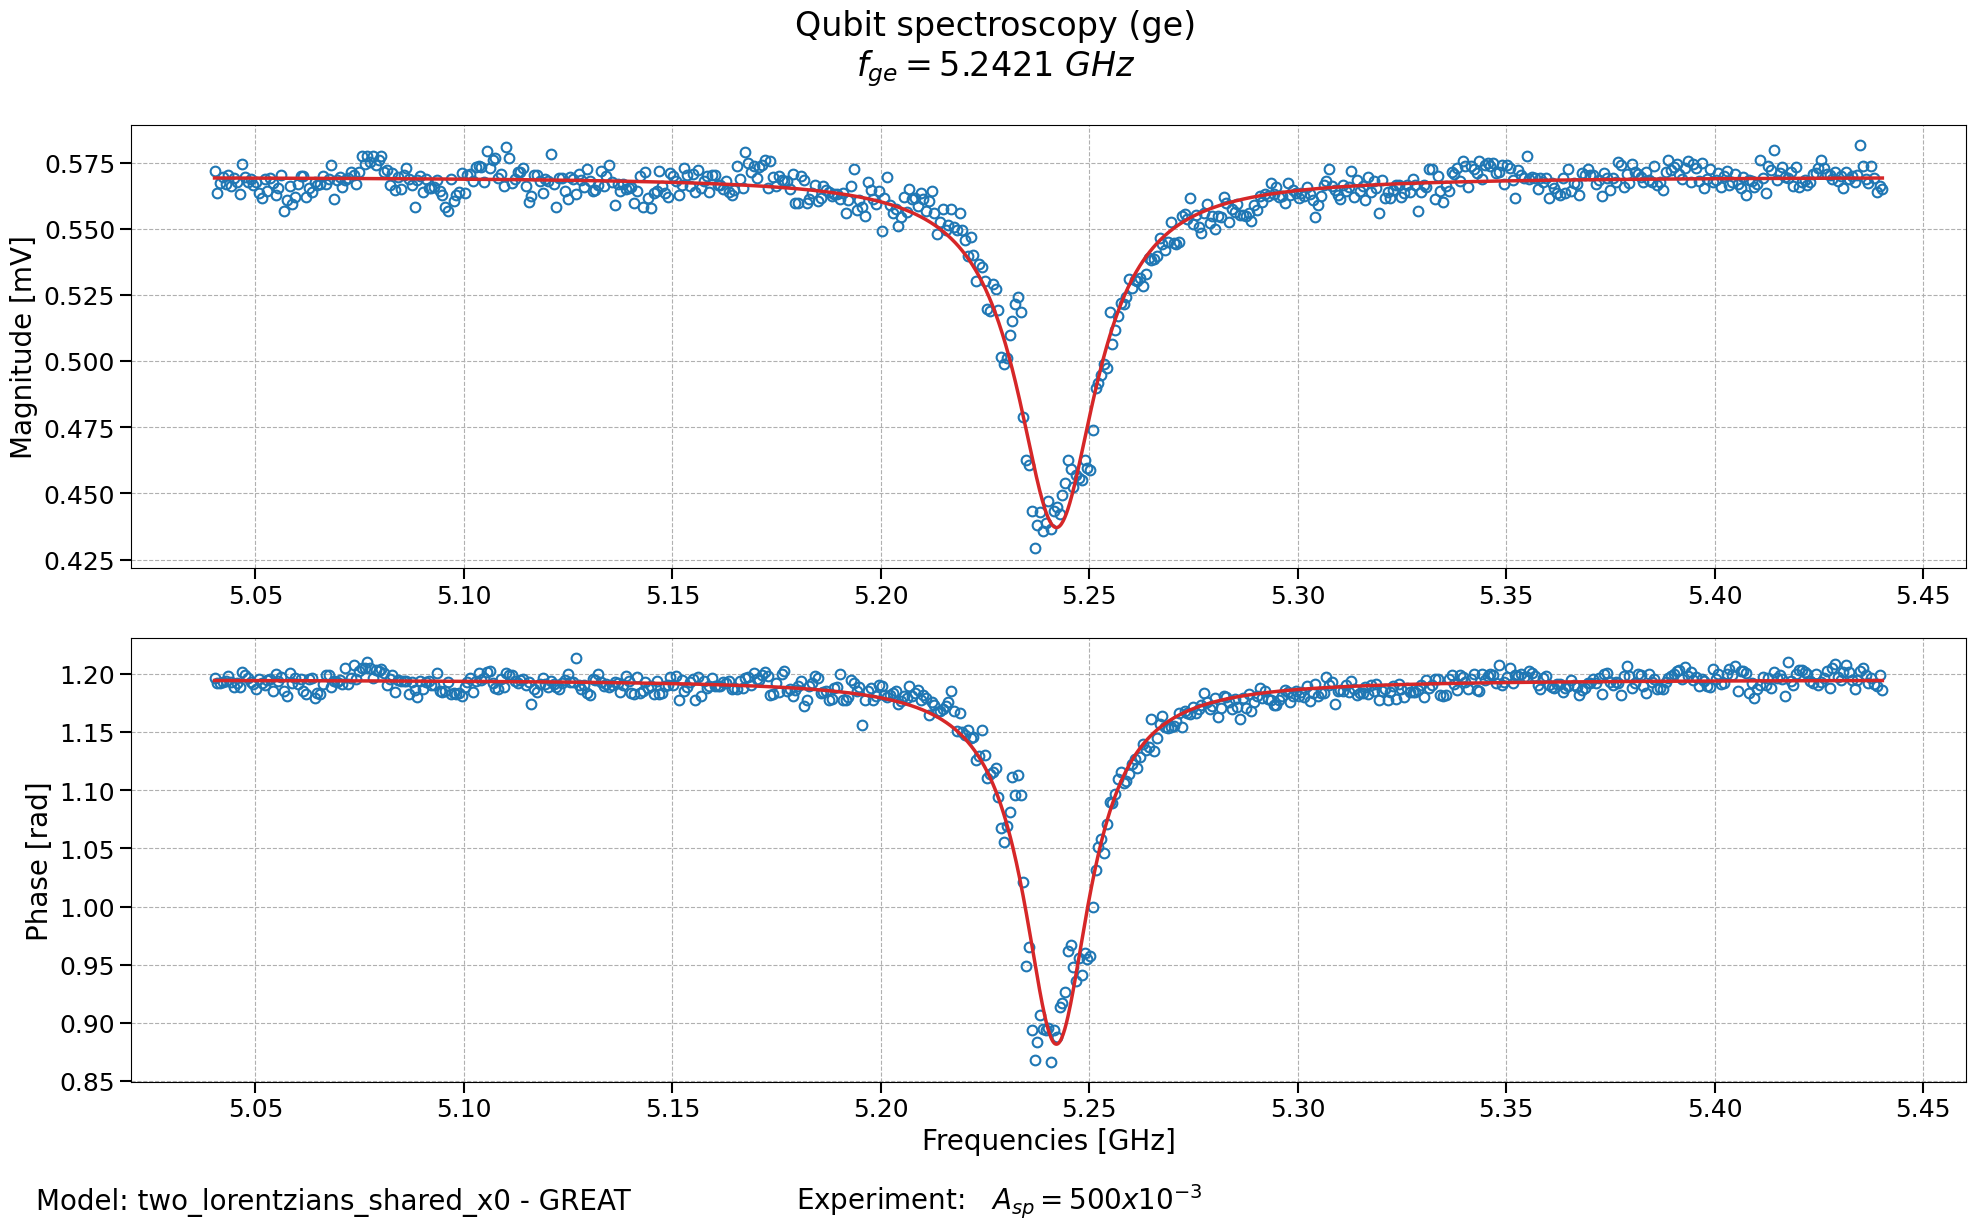

In [ ]:
from sqil_core.experiment import AnalysisResult
from sqil_core.fit import FitQuality
import sqil_core as sqil
from sqil_core.utils import *
from sqil_experiments.analysis.fit import find_shared_peak
import numpy as np
import matplotlib.pyplot as plt


def qu_spec_analysis(
    path=None,
    datadict=None,
    qpu=None,
    at_idx=None,
    transition="ge",
    qu_uid="q0",
    relevant_params=["spectroscopy_amplitude"],
    ** kwargs,
) -> AnalysisResult:
    # Prepare analysis result object
    anal_res = AnalysisResult()
    anal_res.updated_params[qu_uid] = {}
    fit_res = None

    # Extract data and metadata
    all_data, all_info, datadict = get_data_and_info(path=path, datadict=datadict)
    x_data, y_data, sweeps = all_data
    x_info, y_info, sweep_info = all_info

    # Extract qubit parameters
    if qpu is None and path is not None:
        qpu = read_qpu(path, "qpu_old.json")
    qubit_params = {}
    if qpu is not None:
        qubit_params = enrich_qubit_params(qpu.quantum_element_by_uid(qu_uid))
    anal_res.updated_params[qu_uid] = {}
    fit_res = None

    has_sweeps = y_data.ndim > 1

    sqil.set_plot_style(plt)

    if not has_sweeps:
        # Plot without fit
        fig, axs = plot_mag_phase(datadict=datadict)
        anal_res.figures.update({"fig": fig})

        # Fit data to extract parameters
        try:
            is_wide_range = x_data[-1] - x_data[0] > 200e6
            mag, phase = np.abs(y_data), np.unwrap(np.angle(y_data))
            fit_res, trace = find_shared_peak(x_data, mag, phase, full_output=True)
        except Exception as e:
            print(f"Error while fitting", e)
        if fit_res is not None:
            anal_res.fits.update({"Combined mag-phase fit": fit_res})
            param_id = f"resonance_frequency_{transition}"
            anal_res.updated_params[qu_uid].update(
                {param_id: fit_res.params_by_name["x0"]}
            )
            x_fit = np.linspace(x_data[0], x_data[-1], np.max([2000, len(x_data)]))

            if trace in ["mag", "phase"]:
                y_fit_scaled = fit_res.predict(x_fit) * y_info.scale
                ax_idx = 0 if trace == "mag" else 1
                axs[ax_idx].plot(x_fit * x_info.scale, y_fit_scaled, color="tab:red")
            elif trace == "both":
                y_fit = fit_res.predict(x_fit, x_fit, *fit_res.params)
                y_fit_mag = y_fit[: len(x_fit)] * y_info.scale
                y_fit_phase = y_fit[len(x_fit) :]
                axs[0].plot(x_fit * x_info.scale, y_fit_mag, color="tab:red")
                axs[1].plot(x_fit * x_info.scale, y_fit_phase, color="tab:red")
    else:
        fig, axs = plot_mag_phase(datadict=datadict)
        anal_res.figures.update({"fig": fig})
        fit_res = None

    finalize_plot(
        fig,
        f"Qubit spectroscopy ({transition})",
        fit_res,
        qubit_params=qubit_params,
        updated_params=anal_res.updated_params[qu_uid],
        sweep_info=sweep_info,
        relevant_params=relevant_params,
    )
    fig.tight_layout()

    return anal_res


path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-13\00545-qubit_spectroscopy_2025-07-13T211612"

qu_spec_analysis(path)
plt.show()

nrmse       0.01738  GOOD
reduced χ²  1.158    GOOD
| Param   |   Fitted value |   STD error |   % Error |
|---------|----------------|-------------|-----------|
| A       |     1.65846    |   0.02894   |      1.74 |
| tau     |     3.8222e-05 |   1.327e-06 |      3.47 |
| y0      |    -0.450845   |   0.01136   |     -2.52 |



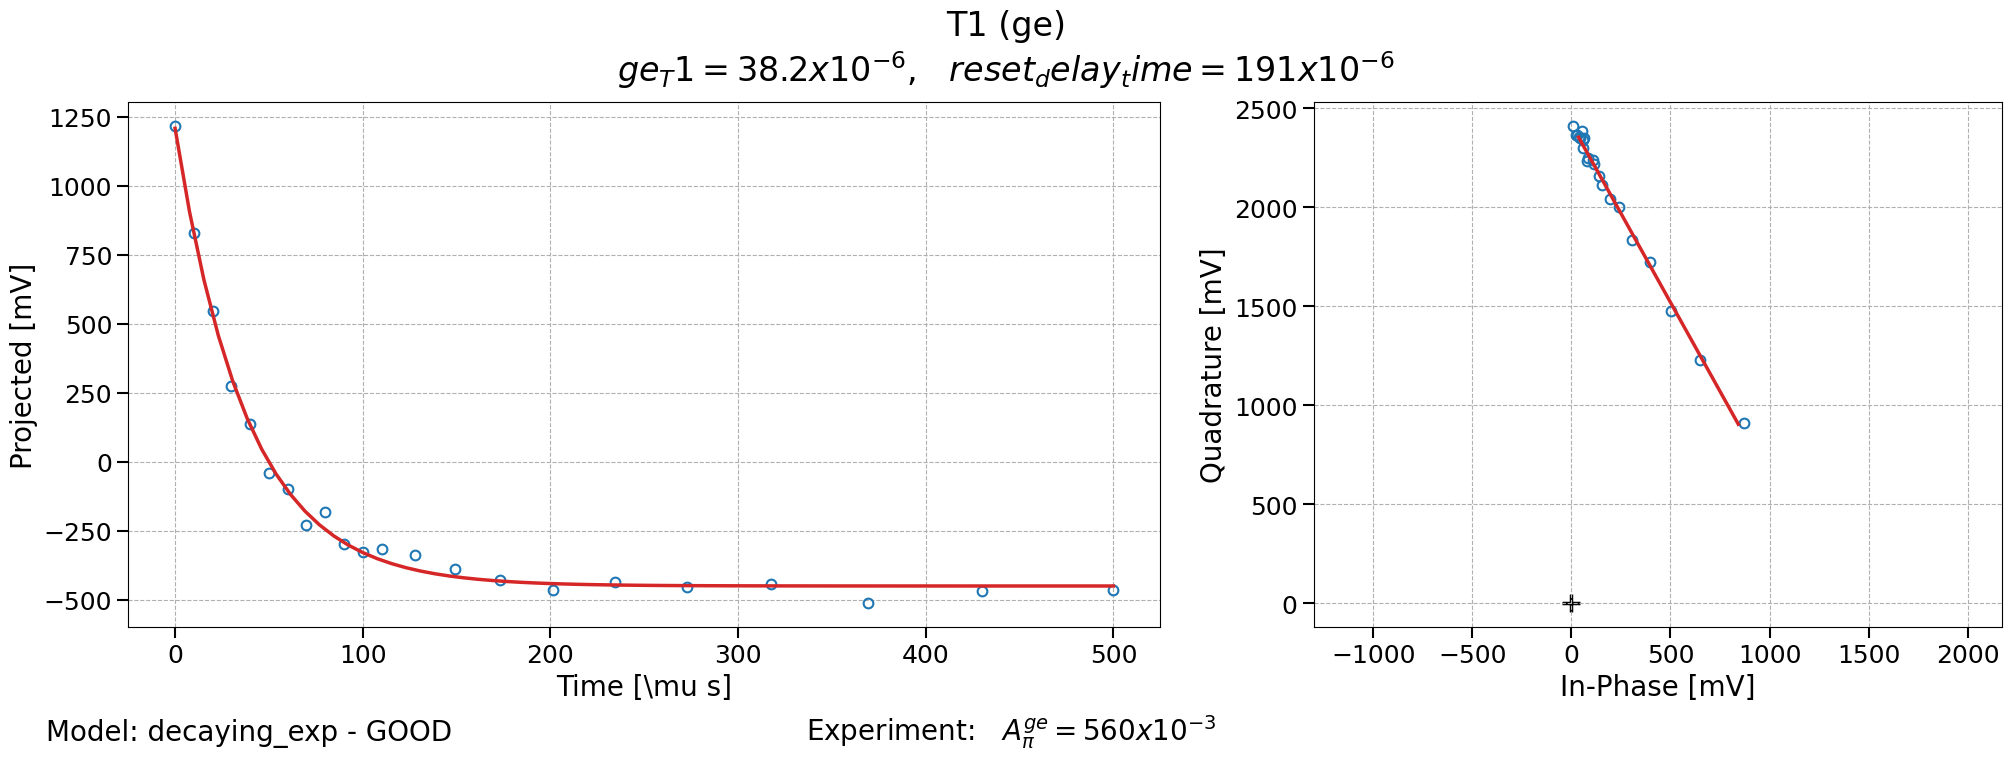

In [ ]:
from sqil_core.experiment import AnalysisResult
from sqil_core.fit import FitQuality
import sqil_core as sqil
from sqil_core.utils import *
from sqil_experiments.analysis.fit import find_shared_peak
import numpy as np
import matplotlib.pyplot as plt


def analyze_T1(path=None, datadict=None, qpu=None, transition="ge", qu_uid="q0", relevant_params=None):
    # Extract data and metadata
    all_data, all_info, datadict = get_data_and_info(path=path, datadict=datadict)
    x_data, y_data, sweeps = all_data
    x_info, y_info, sweep_info = all_info

    # Extract qubit parameters
    if qpu is None and path is not None:
        qpu = read_qpu(path, "qpu_old.json")
    qubit_params = {}
    if qpu is not None:
        qubit_params = enrich_qubit_params(qpu.quantum_element_by_uid(qu_uid))

    if relevant_params is None:
        relevant_params = [f"{transition}_drive_amplitude_pi"]

    # Define analysis result
    anal_res = AnalysisResult()
    anal_res.updated_params[qu_uid] = {}
    fit_res = None

    # Plot raw data and extract projection
    fig, axs, proj, inv = sqil.plot_projection_IQ(datadict=datadict, full_output=True)
    anal_res.figures.update({"fig": fig})

    # Fit exponential
    fit_res = sqil.fit.fit_decaying_exp(x_data, proj)
    x_fit = np.linspace(x_data[0], x_data[-1], 3 * len(x_data))
    inverse_fit = inv(fit_res.predict(x_fit))

    # Update parameters
    T1 = fit_res.params_by_name["tau"]
    anal_res.updated_params[qu_uid].update({f"{transition}_T1": T1 })
    if transition == "ge":
        anal_res.updated_params[qu_uid].update({"reset_delay_time": 5*T1})

    # Plot the fit
    axs[0].plot(
        x_fit * x_info.scale, fit_res.predict(x_fit) * y_info.scale, "tab:red"
    )
    axs[1].plot(
        inverse_fit.real * y_info.scale,
        inverse_fit.imag * y_info.scale,
        "tab:red",
    )

    finalize_plot(
        fig,
        f"T1 ({transition})",
        fit_res,
        qubit_params,
        updated_params=anal_res.updated_params[qu_uid],
        sweep_info=sweep_info,
        relevant_params=relevant_params,
    )

    return anal_res

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-15\00585-T1_2025-07-15T124533"
analyze_T1(path)
plt.show()

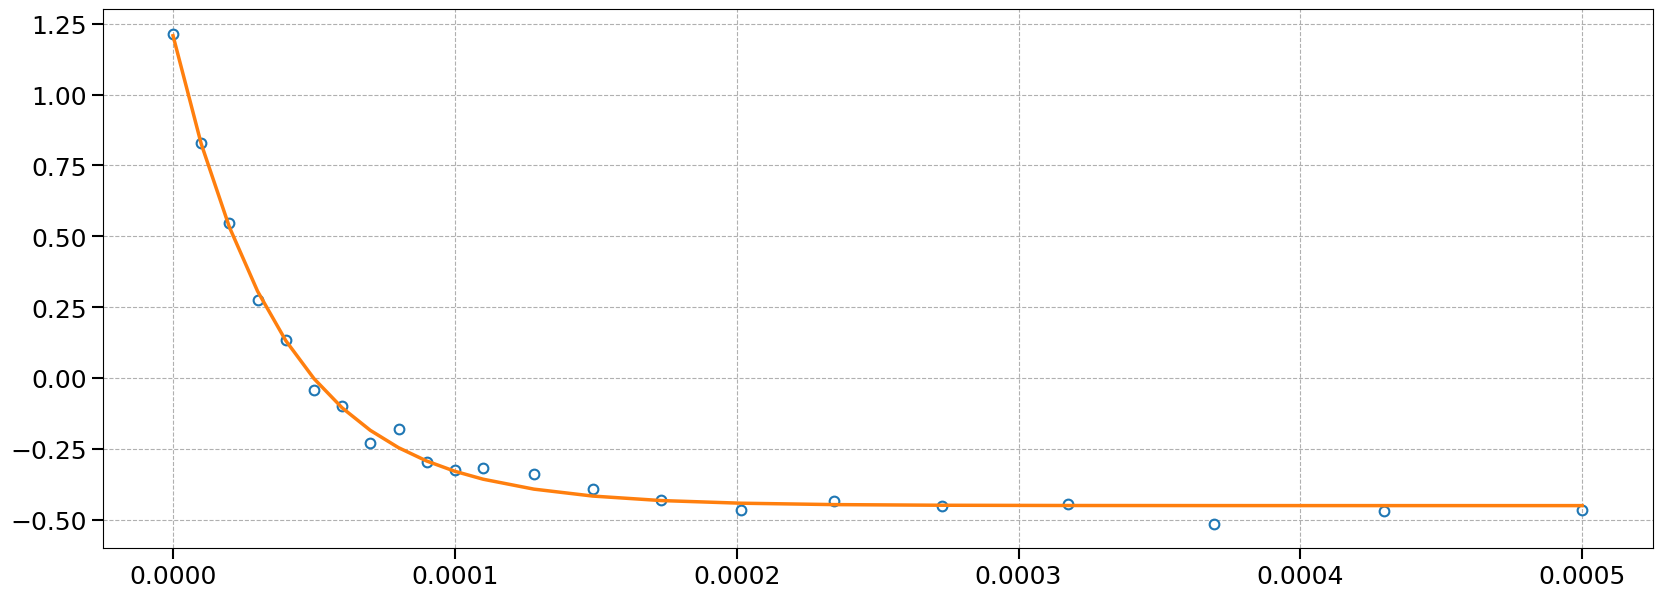

In [13]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-07-15\00585-T1_2025-07-15T124533"

y_data, x_data = extract_h5_data(path, ["data", "time"])

proj, inv = sqil.fit.transform_data(y_data, inv_transform=True)
fit_res = sqil.fit.fit_decaying_exp(x_data, proj)

plt.figure()
plt.plot(x_data, proj, 'o')
plt.plot(x_data, fit_res.predict(x_data))
plt.show()